<a href="https://colab.research.google.com/github/rajenkg01/Idea-Validation/blob/main/Assam_Mortality_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Maternal Deaths Assam Ver 1.csv')

# Basic Data pre-processing

In [ ]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [ ]:
df.head()

0 Original District Original BPHC Reporting District           Reporting BPHC  \
1         Dibrugarh           NaN          Dibrugarh           Barbaruah BPHC   
2         Dibrugarh           NaN          Dibrugarh           Barbaruah BPHC   
3          Sonitpur           NaN           Sonitpur  Biswanath Chariali BPHC   
4     Karbi Anglong           NaN      Karbi Anglong             Bokajan BPHC   
5        Dima Hasao           NaN         Dima Hasao               Mahur BPHC   

0                 Reporting Health Institution Reported On Reporting Time  \
1  Assam Medical College & Hospital, Dibrugarh         NaN            NaN   
2  Assam Medical College & Hospital, Dibrugarh         NaN            NaN   
3                      Biswanath Chariali SDCH         NaN            NaN   
4                                          NaN         NaN            NaN   
5                              Harangajao MPHC         NaN            NaN   

0 Date of Death Time of Death Age                                 Address  \
1      28/01/13       1:00 AM  22  1 No. Panibura Pather, Disang Rongswal   
2      26/01/13       6:00 PM  22               Chiring Chapori,Dibrugarh   
3      24/01/13       1:00 AM  26                      Biswanath Chariali   
4      23/01/13       3:00 AM  29                  Nowkata, Gorialdubi SC   
5      21/01/13       1:30 PM  22           Rekho, Harangajao, Dima Hasao   

0   Place of Death           When did death occur   Cause of Death remarks  
1  Health Facility  Within 42 days after delivery           Others     NaN  
2  Health Facility               During Pregnancy           Others     NaN  
3  Health Facility  Within 42 days after delivery           Anemia     NaN  
4           Others                During delivery  Cause not known     NaN  
5  Health Facility  Within 42 days after delivery           Anemia     NaN

In [ ]:
df = df.drop(['Reporting Time', 'Reported On', 'remarks', 'Original BPHC', 'Address'], axis = 1)

In [ ]:
(df['Original District'] == df['Reporting District']).value_counts()

True     8340
False    3210
Name: count, dtype: int64

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(11542, 10)

In [ ]:
df.isnull().sum()

0
Original District                  0
Reporting District                 0
Reporting BPHC                     3
Reporting Health Institution    3172
Date of Death                      0
Time of Death                     43
Age                               71
Place of Death                     0
When did death occur             292
Cause of Death                     0
dtype: int64

## Replacing age values in median

In [ ]:
# Drop rows where 'Age' is 250, 0, or 2
df = df[~df['Age'].isin(['250', '0', '2', '267'])]

# Verify the result
print(df['Age'].value_counts())

Age
20    1348
25    1284
22     914
30     912
26     757
28     723
19     700
23     635
24     625
27     509
35     469
21     458
18     358
32     342
29     258
36     126
34     116
38     113
31     106
33     104
40      82
37      70
39      32
17      23
42      16
45      14
16      12
43       8
15       7
41       6
50       4
46       4
44       3
13       3
14       2
47       2
10       1
65       1
52       1
Name: count, dtype: int64


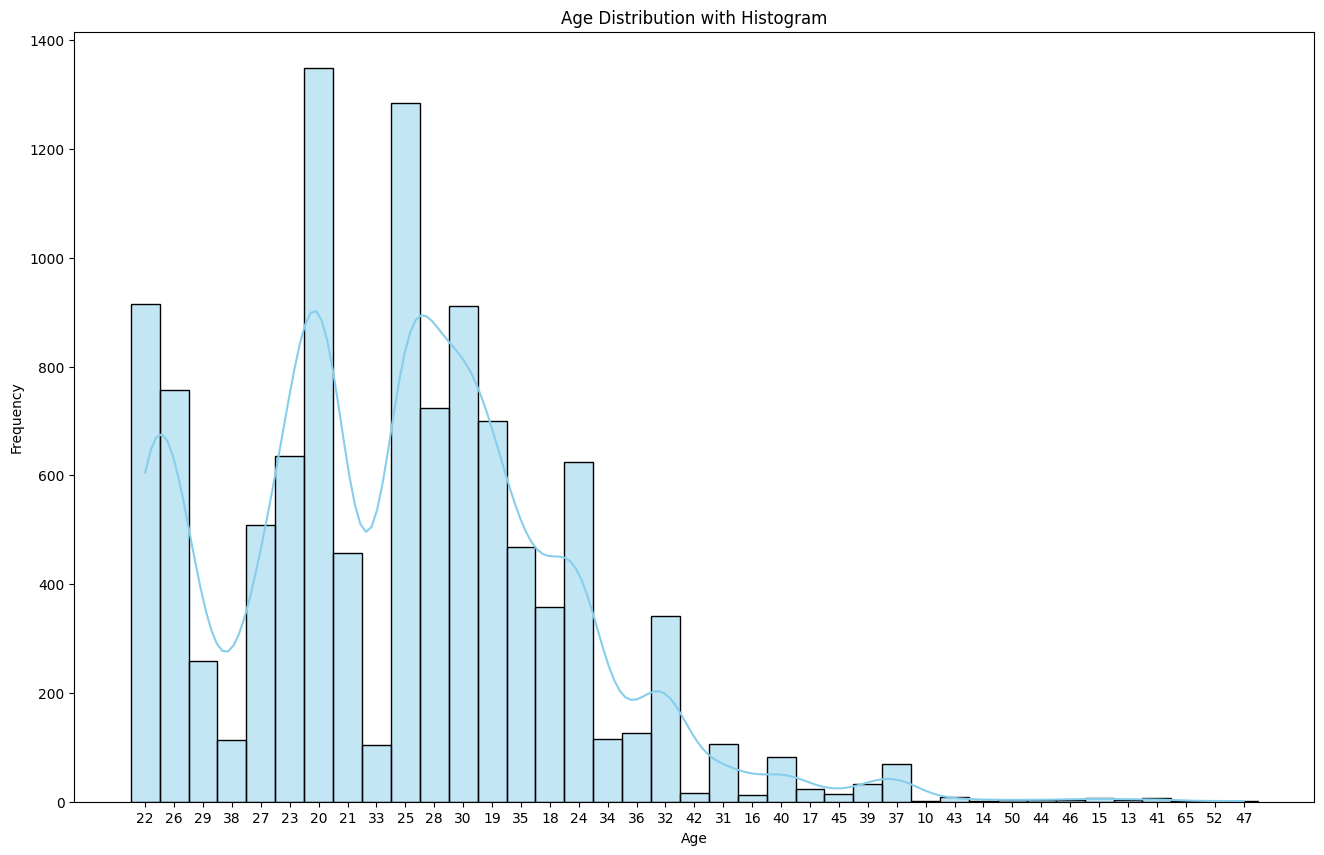

In [ ]:
# Plotting the histogram with a distribution curve
plt.figure(figsize=(16, 10))
sns.histplot(df['Age'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title("Age Distribution with Histogram")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Convert Age column to numeric, forcing errors to NaN (useful if there are non-numeric values)
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

# Fill NaN values in Age with the median and assign to age_final column
df['Age'] = df['Age'].fillna(df['Age'].median())


In [ ]:
df.head()

0 Original District Reporting District           Reporting BPHC  \
1         Dibrugarh          Dibrugarh           Barbaruah BPHC   
2         Dibrugarh          Dibrugarh           Barbaruah BPHC   
3          Sonitpur           Sonitpur  Biswanath Chariali BPHC   
4     Karbi Anglong      Karbi Anglong             Bokajan BPHC   
5        Dima Hasao         Dima Hasao               Mahur BPHC   

0                 Reporting Health Institution Date of Death Time of Death  \
1  Assam Medical College & Hospital, Dibrugarh      28/01/13       1:00 AM   
2  Assam Medical College & Hospital, Dibrugarh      26/01/13       6:00 PM   
3                      Biswanath Chariali SDCH      24/01/13       1:00 AM   
4                                          NaN      23/01/13       3:00 AM   
5                              Harangajao MPHC      21/01/13       1:30 PM   

0   Age   Place of Death           When did death occur   Cause of Death  
1  22.0  Health Facility  Within 42 days after delivery           Others  
2  22.0  Health Facility               During Pregnancy           Others  
3  26.0  Health Facility  Within 42 days after delivery           Anemia  
4  29.0           Others                During delivery  Cause not known  
5  22.0  Health Facility  Within 42 days after delivery           Anemia

In [ ]:
df['Reporting Health Institution'] = df['Reporting Health Institution'].fillna('Unknown')

df['Place of Death'] = df['Place of Death'].fillna('Unknown')

df['Time of Death'] = df['Time of Death'].fillna('Unknown')

df['Reporting BPHC'] = df['Reporting BPHC'].fillna('Unknown')

df['When did death occur'] = df['When did death occur'].fillna('Unknown')

In [ ]:
df['Cause of Death'].replace('PIH (EclAMpsia)', 'PIH (Eclampsia)', inplace=True)

In [ ]:
df.isnull().sum()

0
Original District               0
Reporting District              0
Reporting BPHC                  0
Reporting Health Institution    0
Date of Death                   0
Time of Death                   0
Age                             0
Place of Death                  0
When did death occur            0
Cause of Death                  0
dtype: int64

In [ ]:
df['Cause of Death'].value_counts()

Cause of Death
Others               4302
Anemia               1982
PIH (Eclampsia)      1582
Cause not known      1232
Haemorrage           1051
Sepsis                820
Obstructed Labour     129
Abortion              121
Name: count, dtype: int64

# Exploratory data Analysis

## Distribution for reason of death

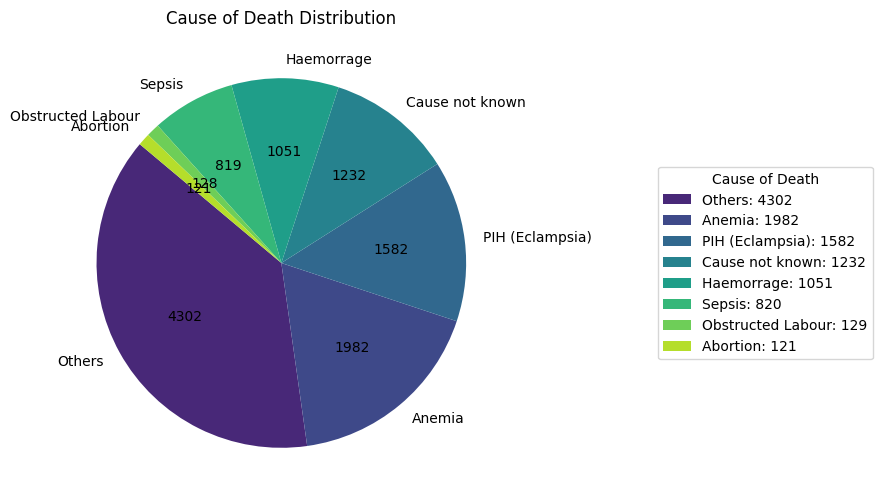

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the occurrences of each cause of death
cause_counts = df['Cause of Death'].value_counts()

# Set a color palette using Seaborn
colors = sns.color_palette('viridis', len(cause_counts))

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(cause_counts, labels=cause_counts.index, autopct=lambda p: f'{int(p * sum(cause_counts) / 100)}', startangle=140, colors=colors)
plt.title('Cause of Death Distribution')

# Add a legend with counts
plt.legend(
    labels=[f'{label}: {count}' for label, count in zip(cause_counts.index, cause_counts)],
    title="Cause of Death",
    loc="center left",
    bbox_to_anchor=(1.3, 0, 0.5, 1)  # Adjusts position to the right of the pie chart
)

plt.show()


## Top districts with most deaths

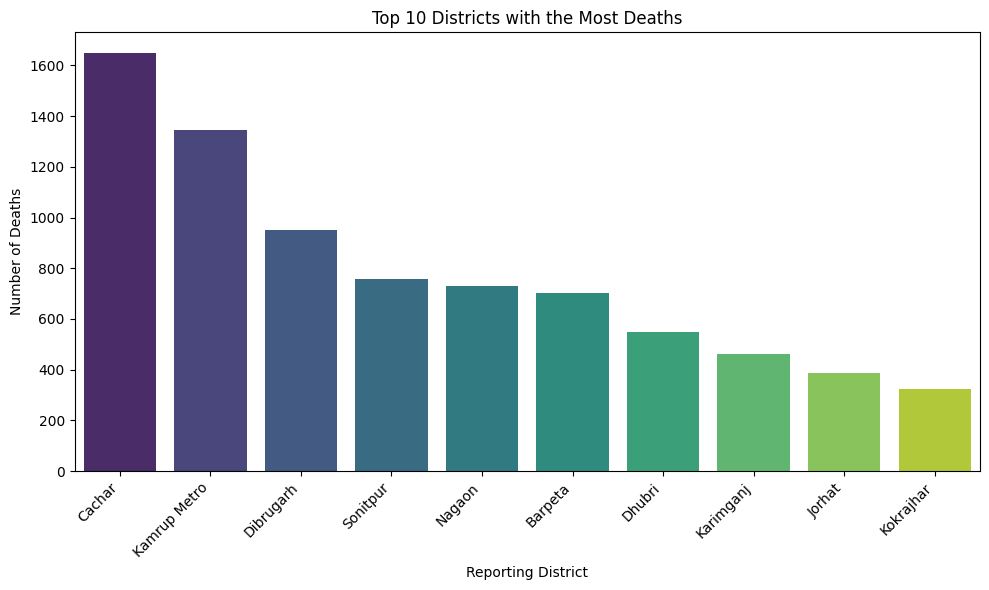

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'District' and count the occurrences (i.e., number of deaths)
district_death_count = df['Reporting District'].value_counts().reset_index(name='Count')

# Rename the columns for clarity
district_death_count.columns = ['Reporting District', 'Count']

# Select top 10 districts with the most deaths
top_10_districts = district_death_count.head(10)

# Plot the data
plt.figure(figsize=(10, 6))
sns.barplot(x='Reporting District', y='Count', data=top_10_districts, palette='viridis')

# Customize the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.xlabel('Reporting District')
plt.ylabel('Number of Deaths')
plt.title('Top 10 Districts with the Most Deaths')

# Display the plot
plt.tight_layout()
plt.show()


## Top 25 Institutions where death has taken place

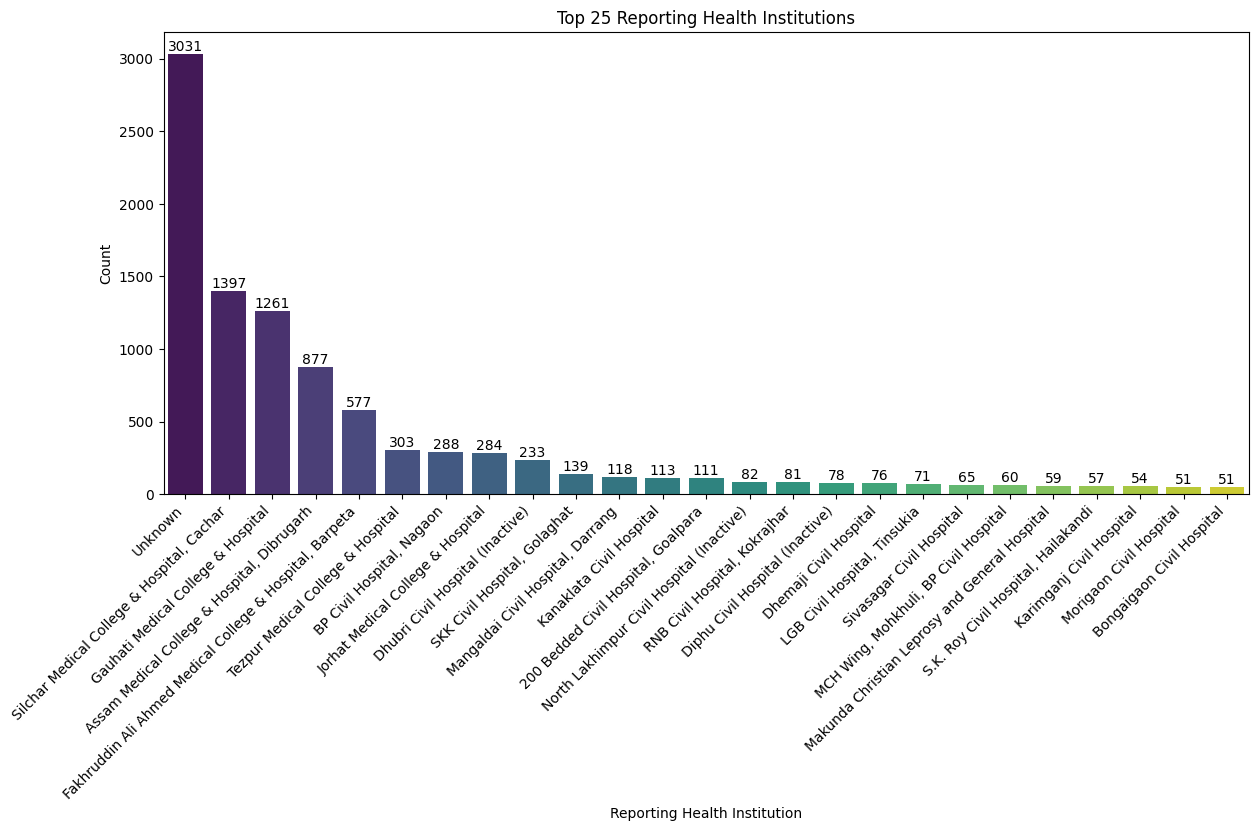

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the top 25 health institutions
top_25_institutions = df['Reporting Health Institution'].value_counts()[:25]

# Set the figure size for a wider chart
plt.figure(figsize=(14, 6))

# Create the bar plot
sns.barplot(x=top_25_institutions.index, y=top_25_institutions.values, palette='viridis')

# Customize x-axis labels
plt.xticks(rotation=45, ha='right')  # Tilt labels to 45 degrees and align to the right

# Add labels and title
plt.xlabel('Reporting Health Institution')
plt.ylabel('Count')
plt.title('Top 25 Reporting Health Institutions')

# Add count labels on top of each bar
for index, value in enumerate(top_25_institutions.values):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.show()


## Death vs Year Trend


Summary Statistics:
Date range: 2012-01 to 2024-12
Total deaths: 11,219
Average deaths per month: 71.9

Top 5 months by death count:
   YearMonth  Count
21   2013-10    133
33   2014-10    131
12   2013-01    129
23   2013-12    124
19   2013-08    123


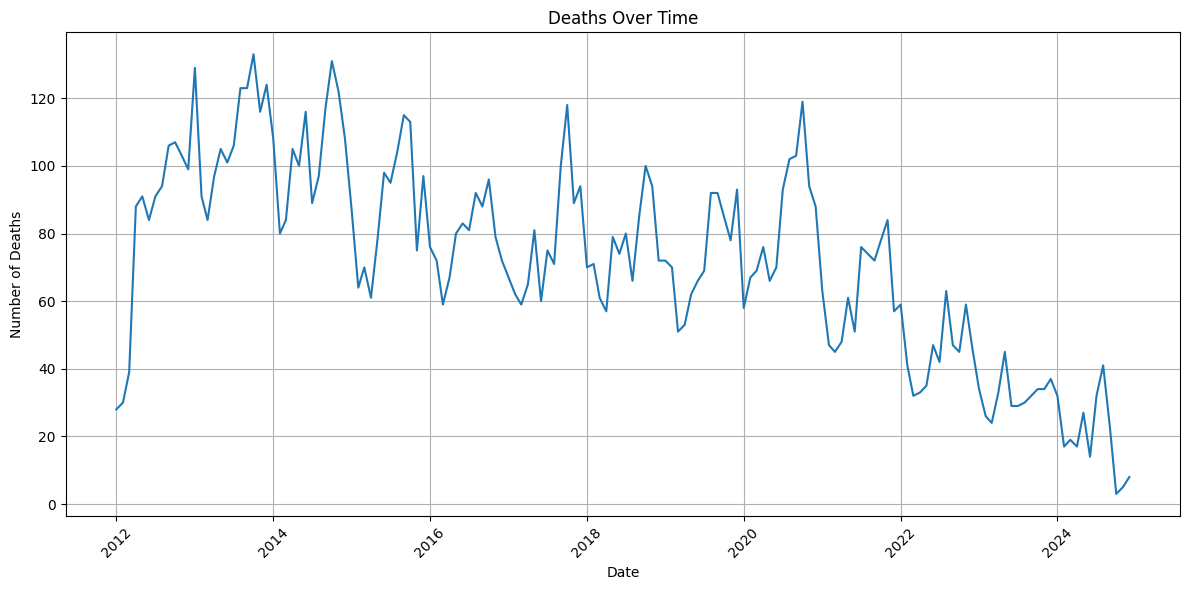

In [ ]:
import pandas as pd

def process_death_dates(df, date_column='Date of Death'):
    """
    Process and group death dates by year and month.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the date column
    date_column (str): Name of the date column

    Returns:
    pandas.DataFrame: Grouped data by year and month with counts
    """
    try:
        # Create a copy of the dataframe
        df_copy = df.copy()

        # Convert to datetime if needed
        if not pd.api.types.is_datetime64_any_dtype(df_copy[date_column]):
            df_copy[date_column] = pd.to_datetime(df_copy[date_column], errors='coerce')

        # Extract year and month first
        df_copy['Year'] = df_copy[date_column].dt.year
        df_copy['Month'] = df_copy[date_column].dt.month

        # Now group by Year and Month
        grouped = df_copy.groupby(['Year', 'Month']).size().reset_index(name='Count')

        # Add additional columns
        grouped['YearMonth'] = grouped.apply(lambda x: f"{int(x['Year'])}-{int(x['Month']):02d}", axis=1)
        grouped['Date'] = pd.to_datetime(grouped['YearMonth'] + '-01')

        # Sort by date
        grouped = grouped.sort_values(['Year', 'Month'])

        # Remove rows with NaT (if any)
        grouped = grouped.dropna(subset=['Year', 'Month'])

        # Print summary statistics
        if not grouped.empty:
            print("\nSummary Statistics:")
            print(f"Date range: {grouped['Date'].min().strftime('%Y-%m')} to {grouped['Date'].max().strftime('%Y-%m')}")
            print(f"Total deaths: {grouped['Count'].sum():,}")
            print(f"Average deaths per month: {grouped['Count'].mean():.1f}")
            print(f"\nTop 5 months by death count:")
            print(grouped.nlargest(5, 'Count')[['YearMonth', 'Count']])

        return grouped

    except Exception as e:
        print(f"Error processing data: {str(e)}")
        print("\nDebugging information:")
        print(f"Date column dtype: {df[date_column].dtype}")
        print("\nFirst few rows of date column:")
        print(df[date_column].head())
        return None

# Example usage:
grouped_data = process_death_dates(df)

if grouped_data is not None:
    # Create visualization
    import matplotlib.pyplot as plt

    plt.figure(figsize=(12, 6))
    plt.plot(grouped_data['Date'], grouped_data['Count'])
    plt.title('Deaths Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Deaths')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Yearwise death trends

In [ ]:
grouped_data = pd.DataFrame(grouped_data)
grouped_data

Year  Month  Count YearMonth       Date
0    2012      1     28   2012-01 2012-01-01
1    2012      2     30   2012-02 2012-02-01
2    2012      3     39   2012-03 2012-03-01
3    2012      4     88   2012-04 2012-04-01
4    2012      5     91   2012-05 2012-05-01
..    ...    ...    ...       ...        ...
151  2024      8     41   2024-08 2024-08-01
152  2024      9     23   2024-09 2024-09-01
153  2024     10      3   2024-10 2024-10-01
154  2024     11      5   2024-11 2024-11-01
155  2024     12      8   2024-12 2024-12-01

[156 rows x 5 columns]

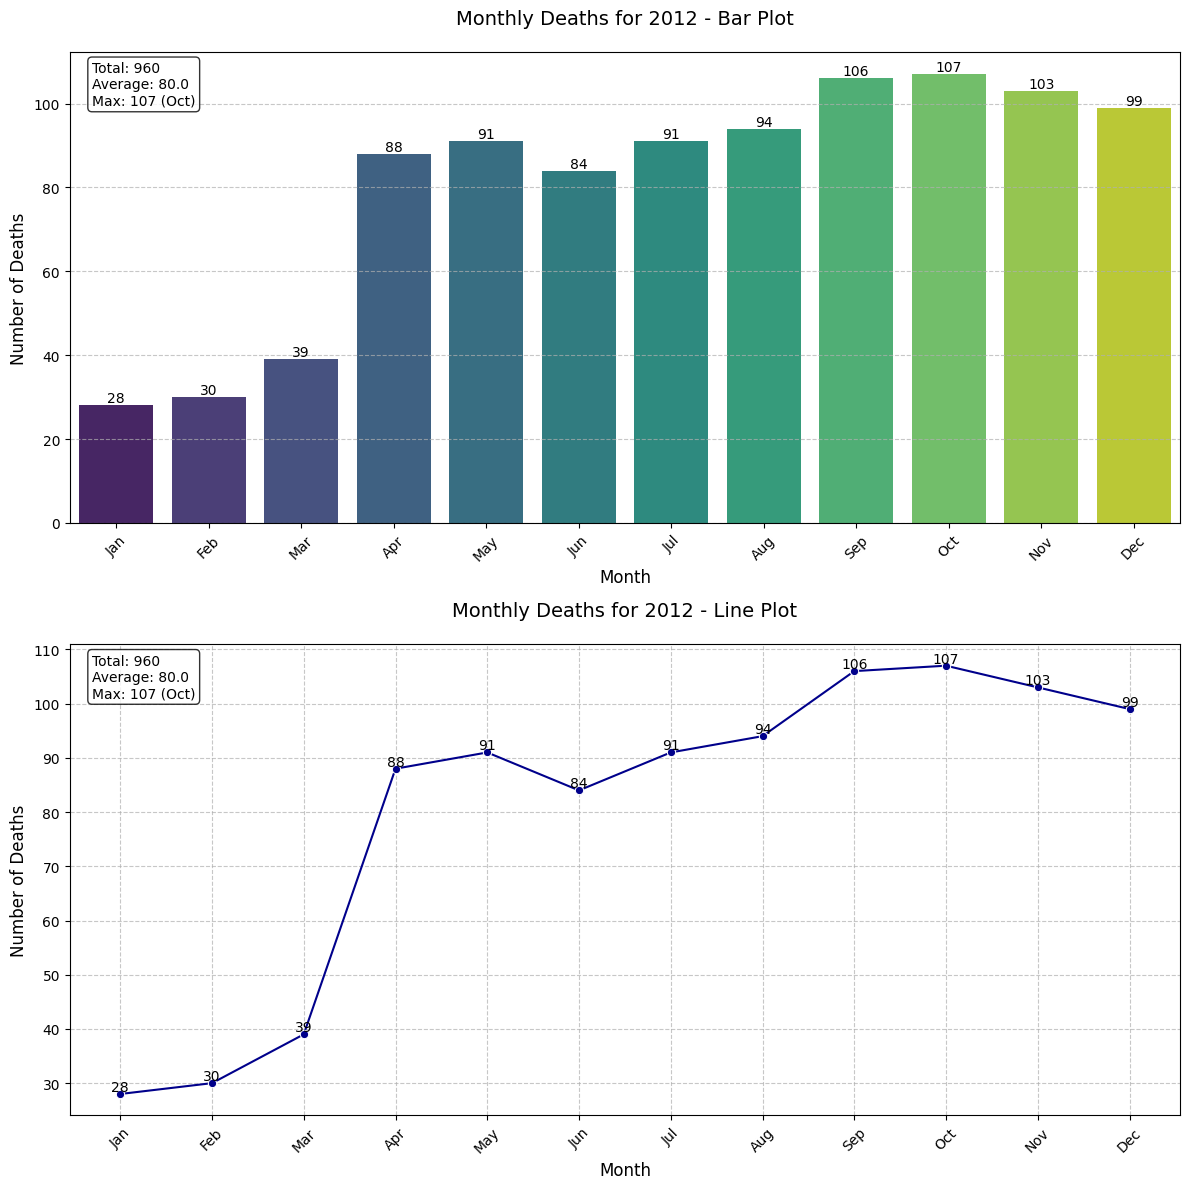


Summary for 2012:
Total deaths: 960
Average deaths per month: 80.0
Highest month: Oct (107 deaths)
Lowest month: Jan (28 deaths)
--------------------------------------------------


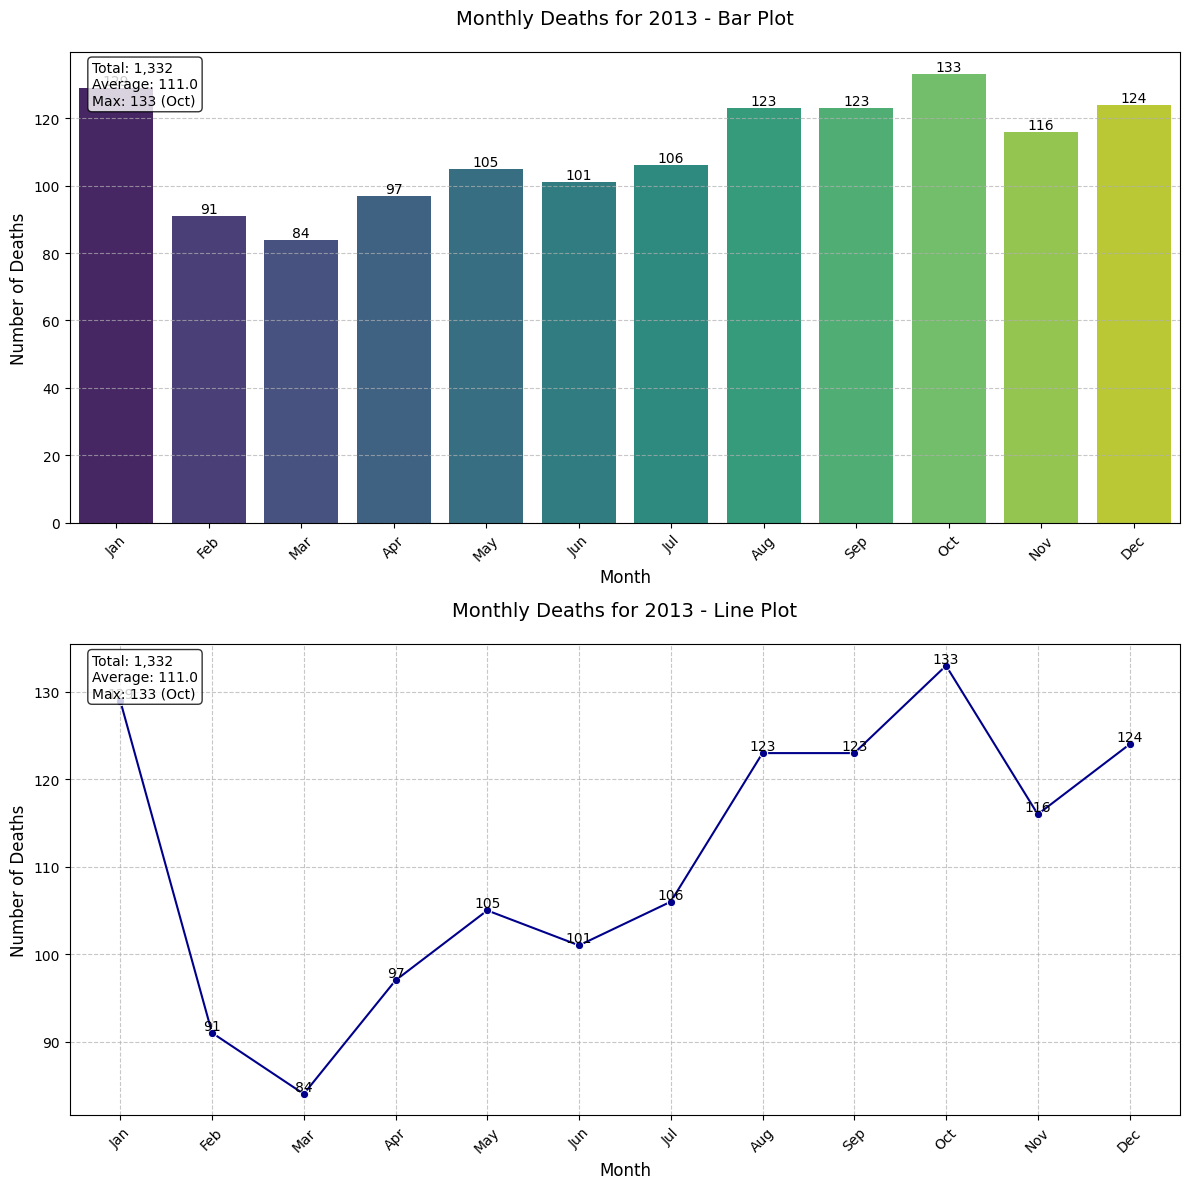


Summary for 2013:
Total deaths: 1,332
Average deaths per month: 111.0
Highest month: Oct (133 deaths)
Lowest month: Mar (84 deaths)
--------------------------------------------------


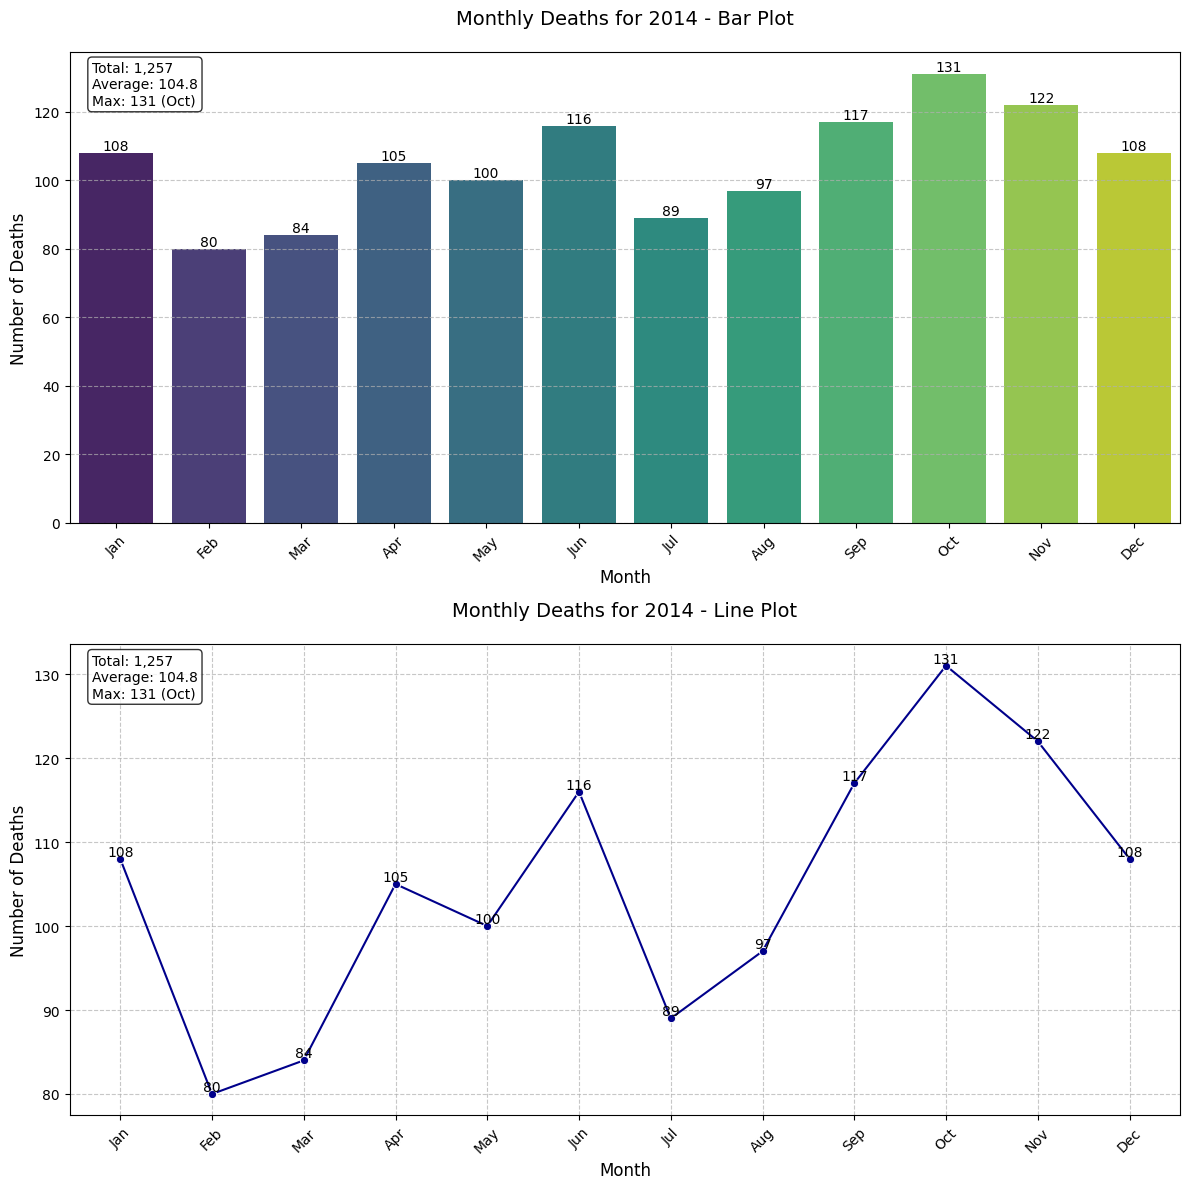


Summary for 2014:
Total deaths: 1,257
Average deaths per month: 104.8
Highest month: Oct (131 deaths)
Lowest month: Feb (80 deaths)
--------------------------------------------------


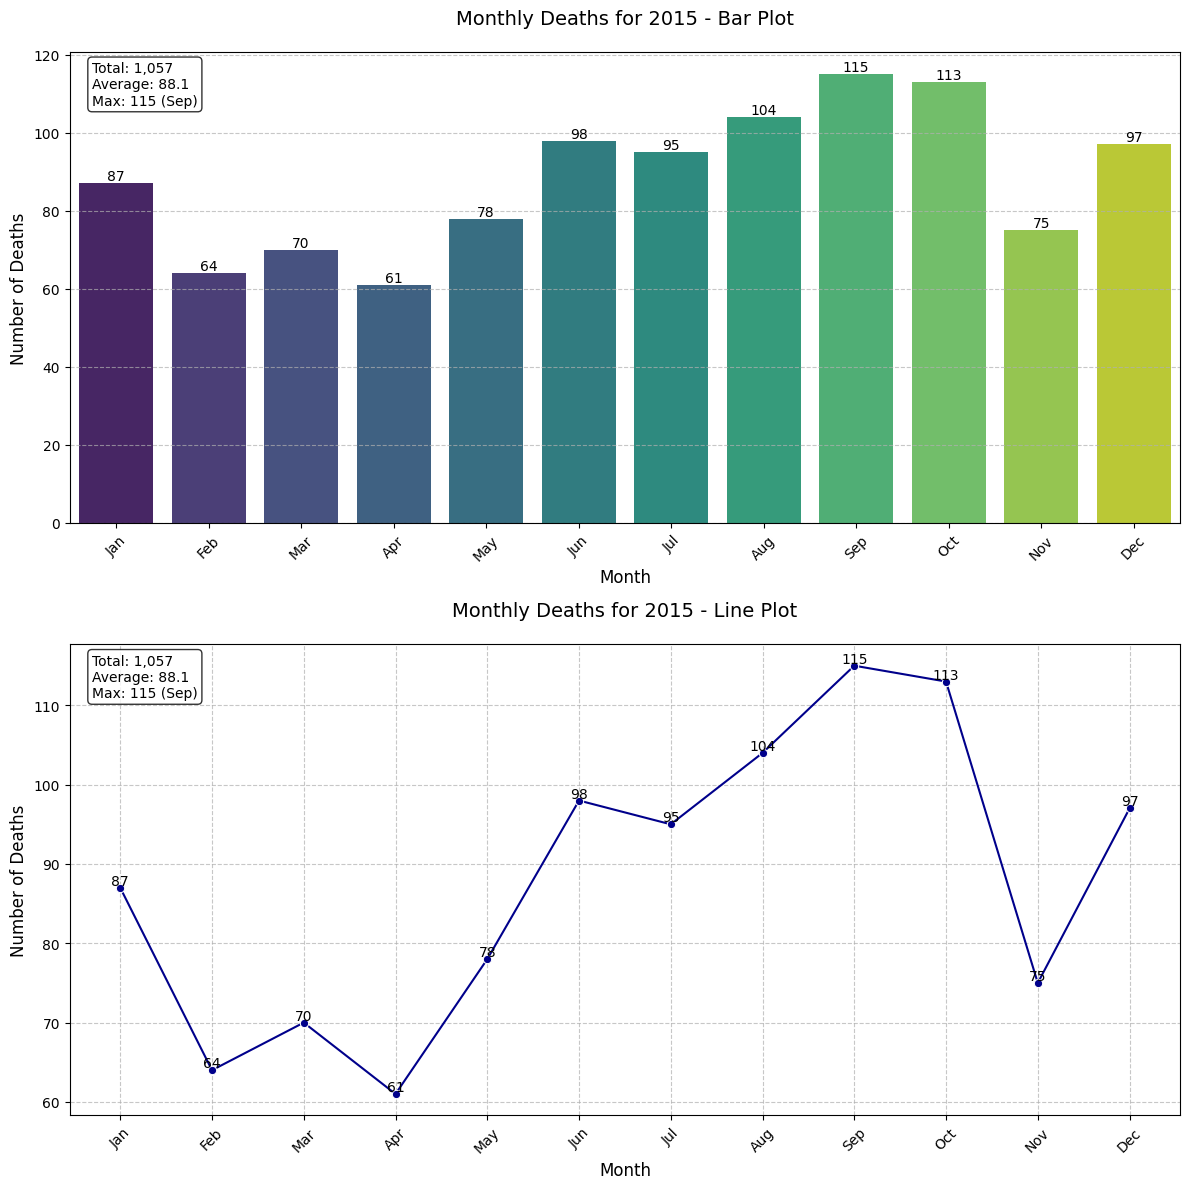


Summary for 2015:
Total deaths: 1,057
Average deaths per month: 88.1
Highest month: Sep (115 deaths)
Lowest month: Apr (61 deaths)
--------------------------------------------------


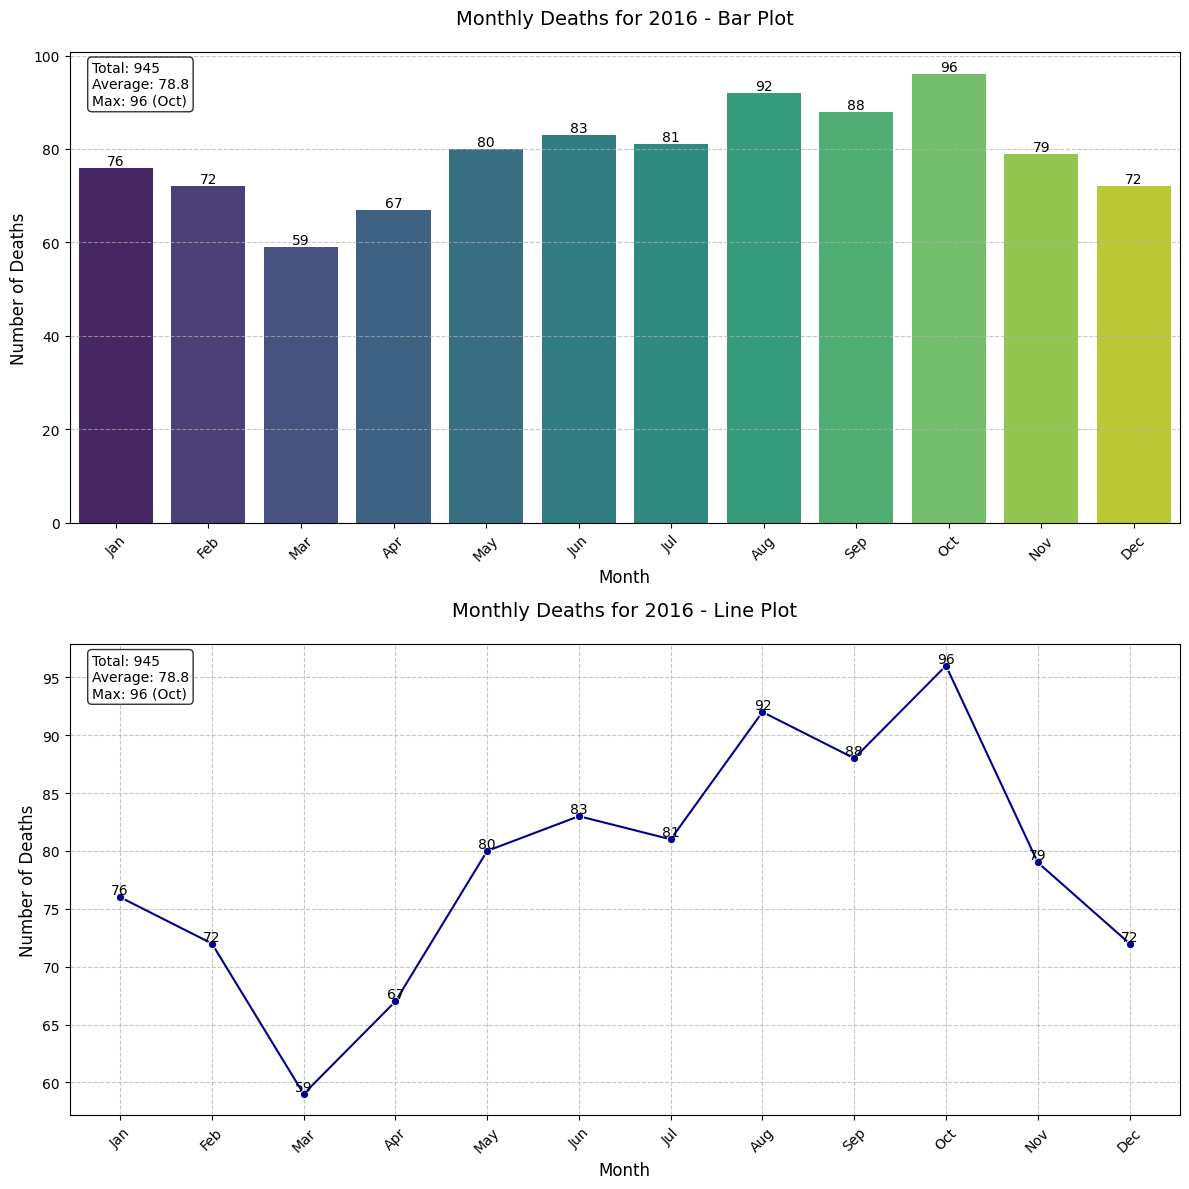


Summary for 2016:
Total deaths: 945
Average deaths per month: 78.8
Highest month: Oct (96 deaths)
Lowest month: Mar (59 deaths)
--------------------------------------------------


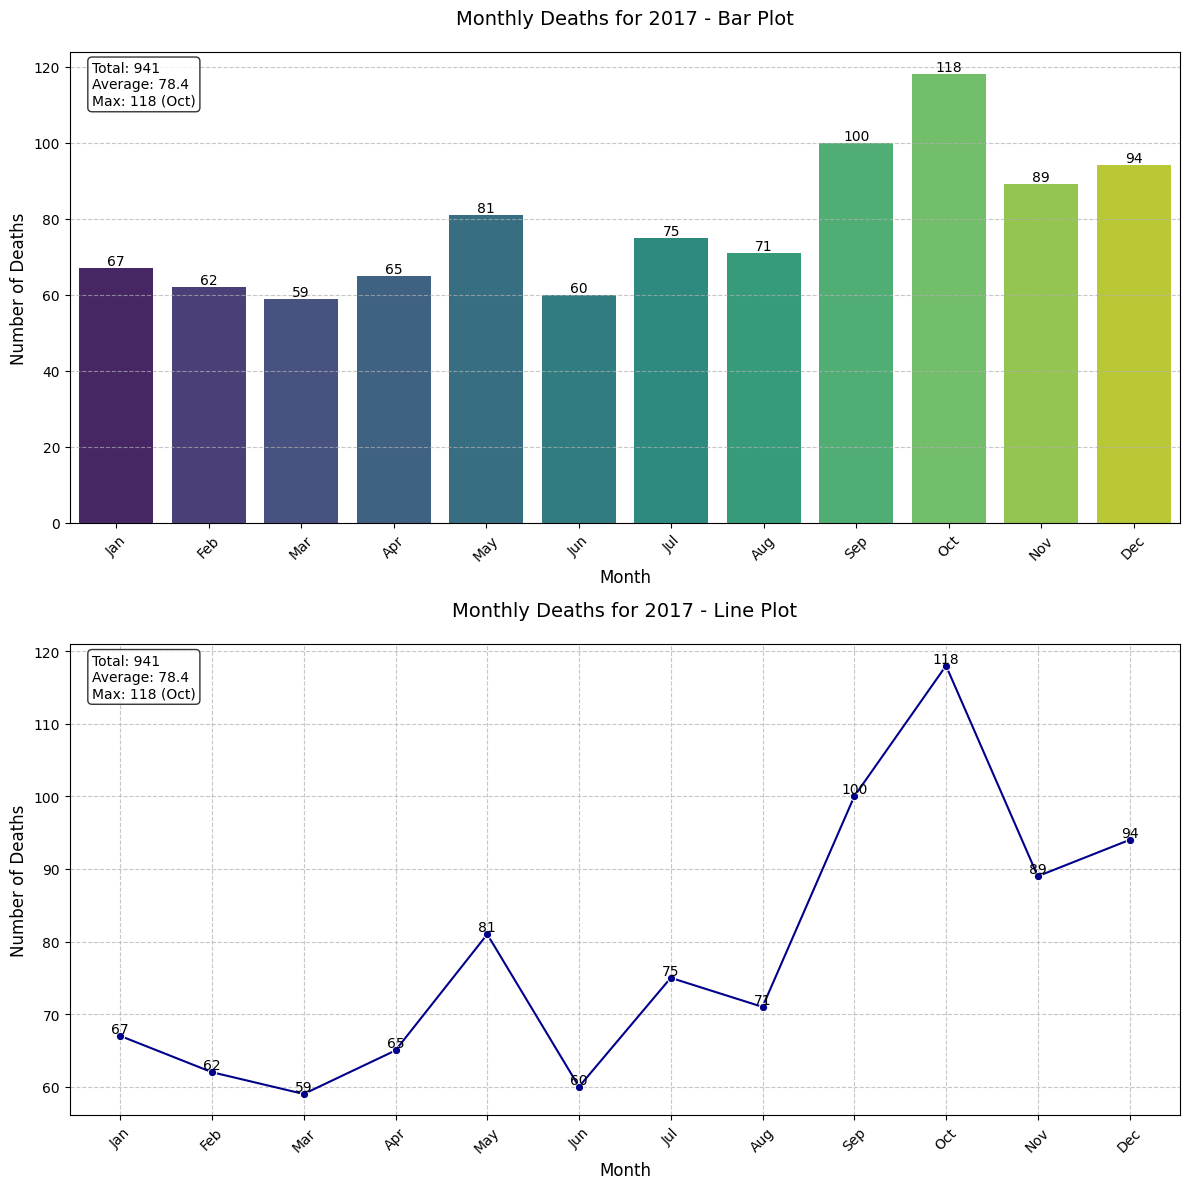


Summary for 2017:
Total deaths: 941
Average deaths per month: 78.4
Highest month: Oct (118 deaths)
Lowest month: Mar (59 deaths)
--------------------------------------------------


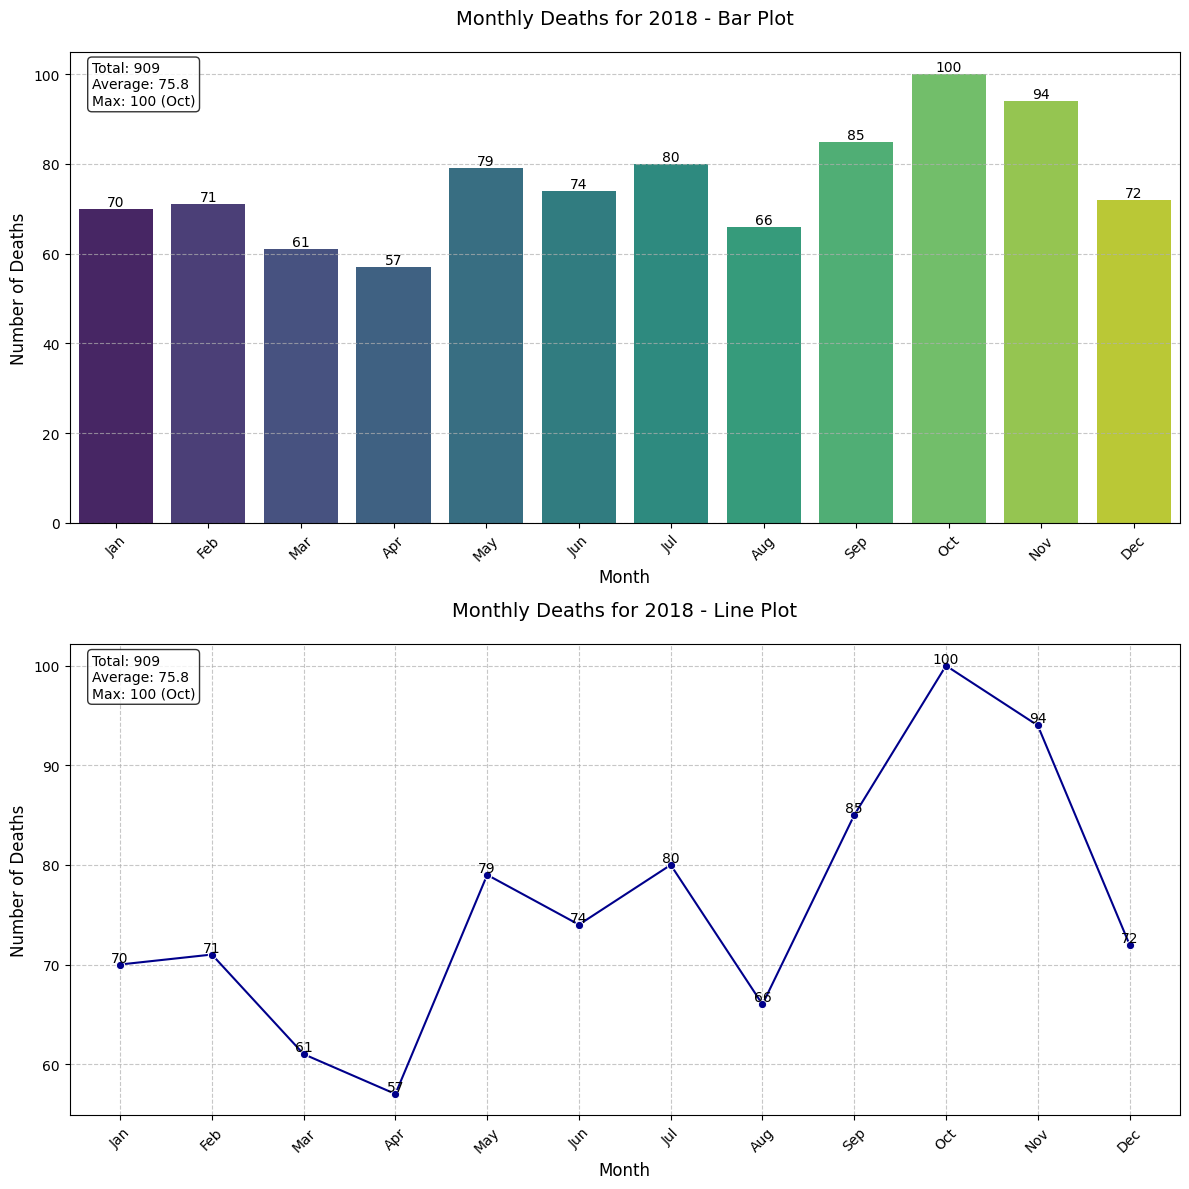


Summary for 2018:
Total deaths: 909
Average deaths per month: 75.8
Highest month: Oct (100 deaths)
Lowest month: Apr (57 deaths)
--------------------------------------------------


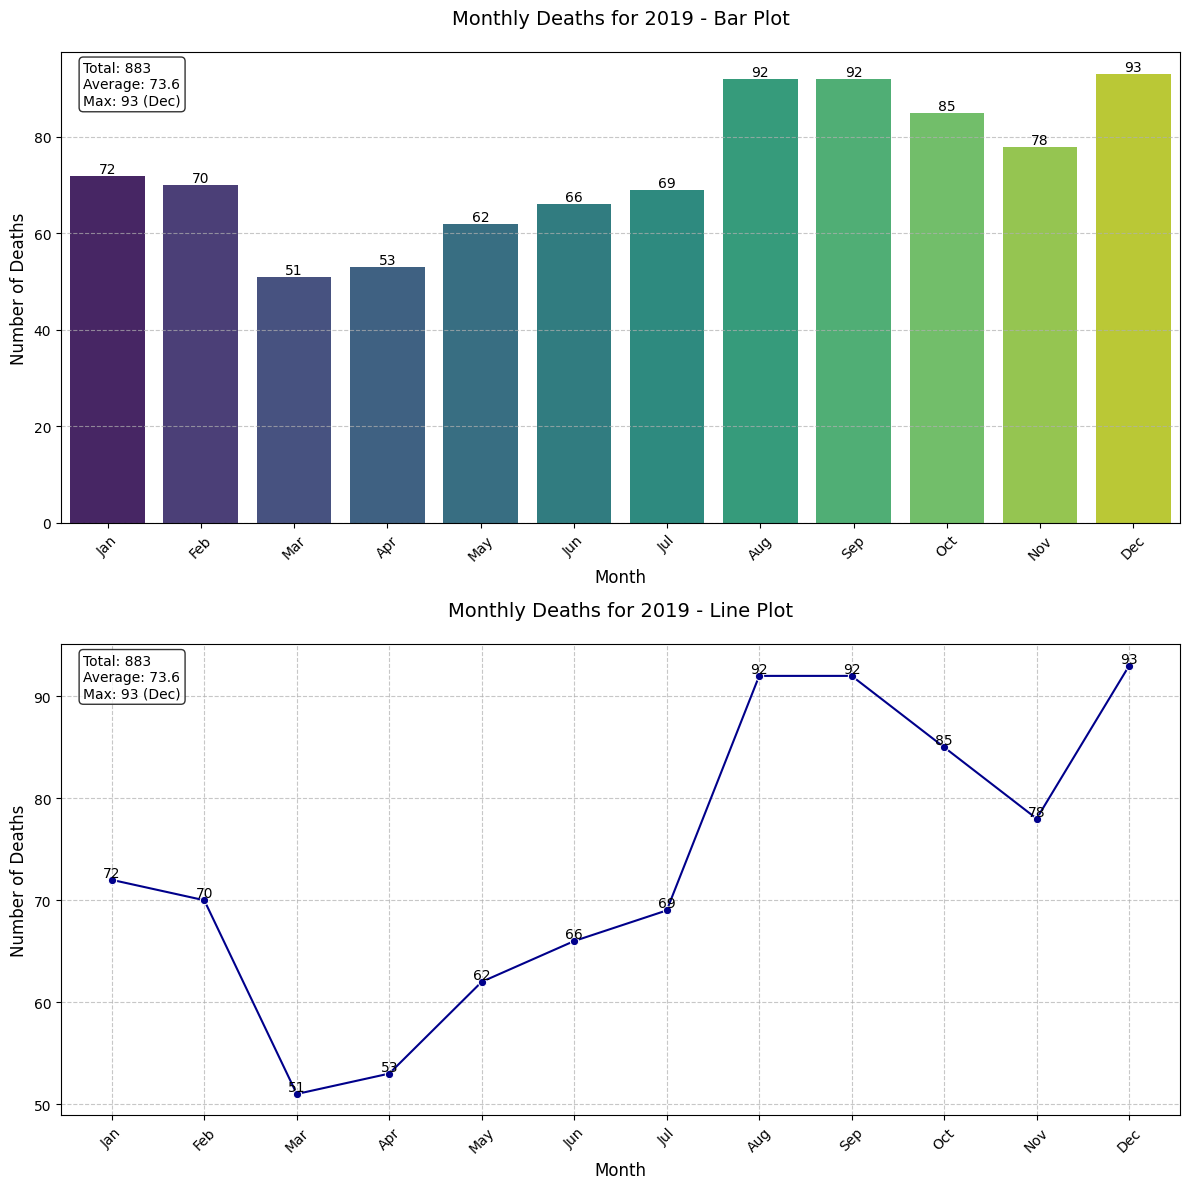


Summary for 2019:
Total deaths: 883
Average deaths per month: 73.6
Highest month: Dec (93 deaths)
Lowest month: Mar (51 deaths)
--------------------------------------------------


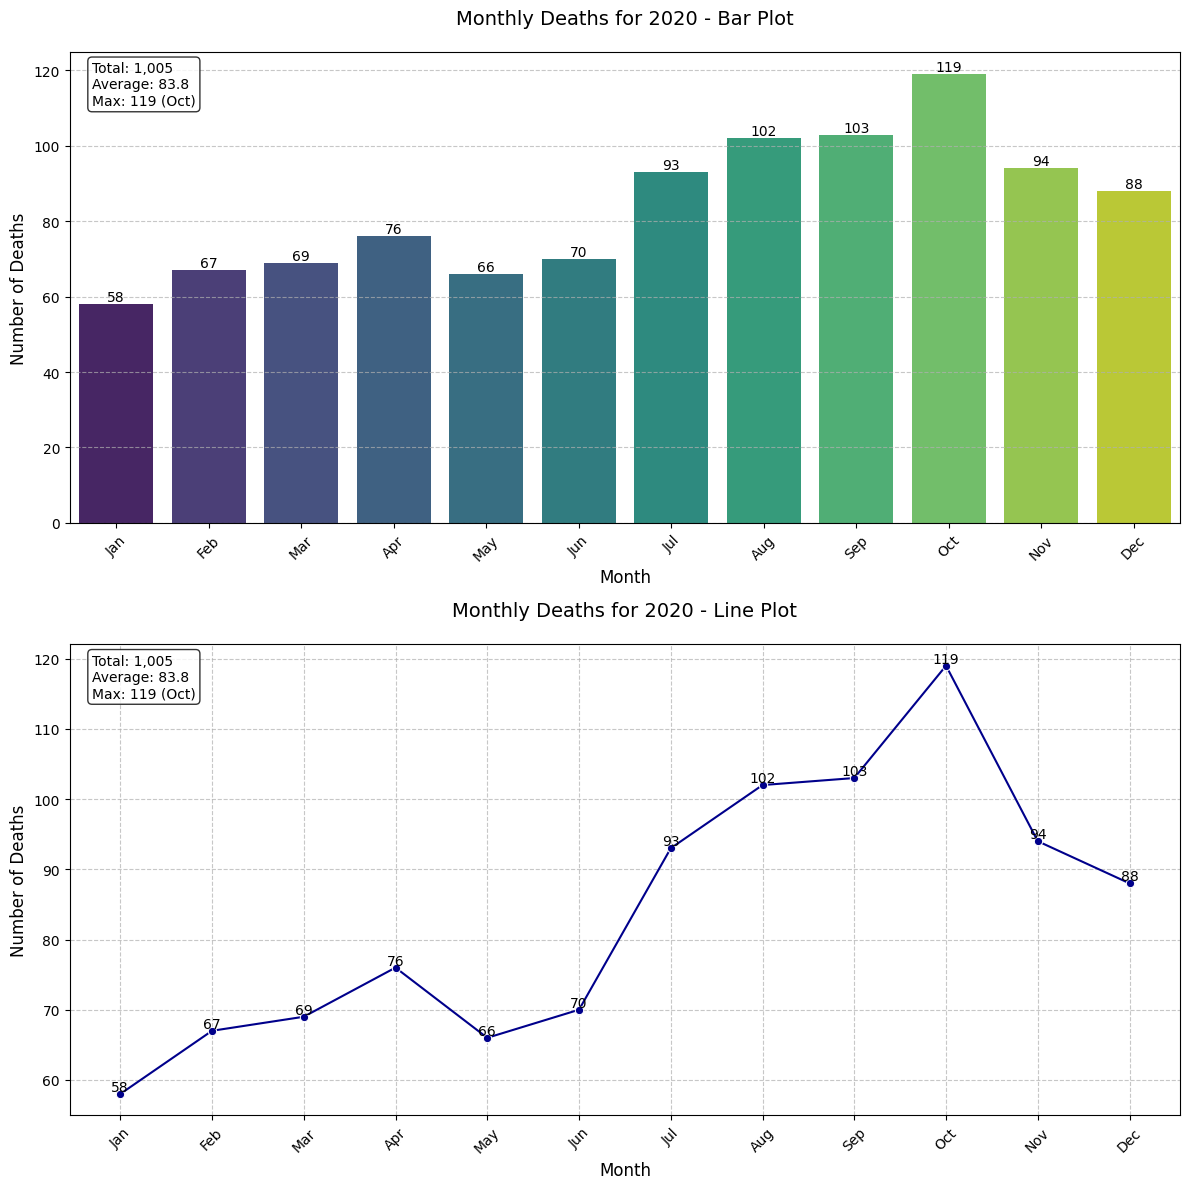


Summary for 2020:
Total deaths: 1,005
Average deaths per month: 83.8
Highest month: Oct (119 deaths)
Lowest month: Jan (58 deaths)
--------------------------------------------------


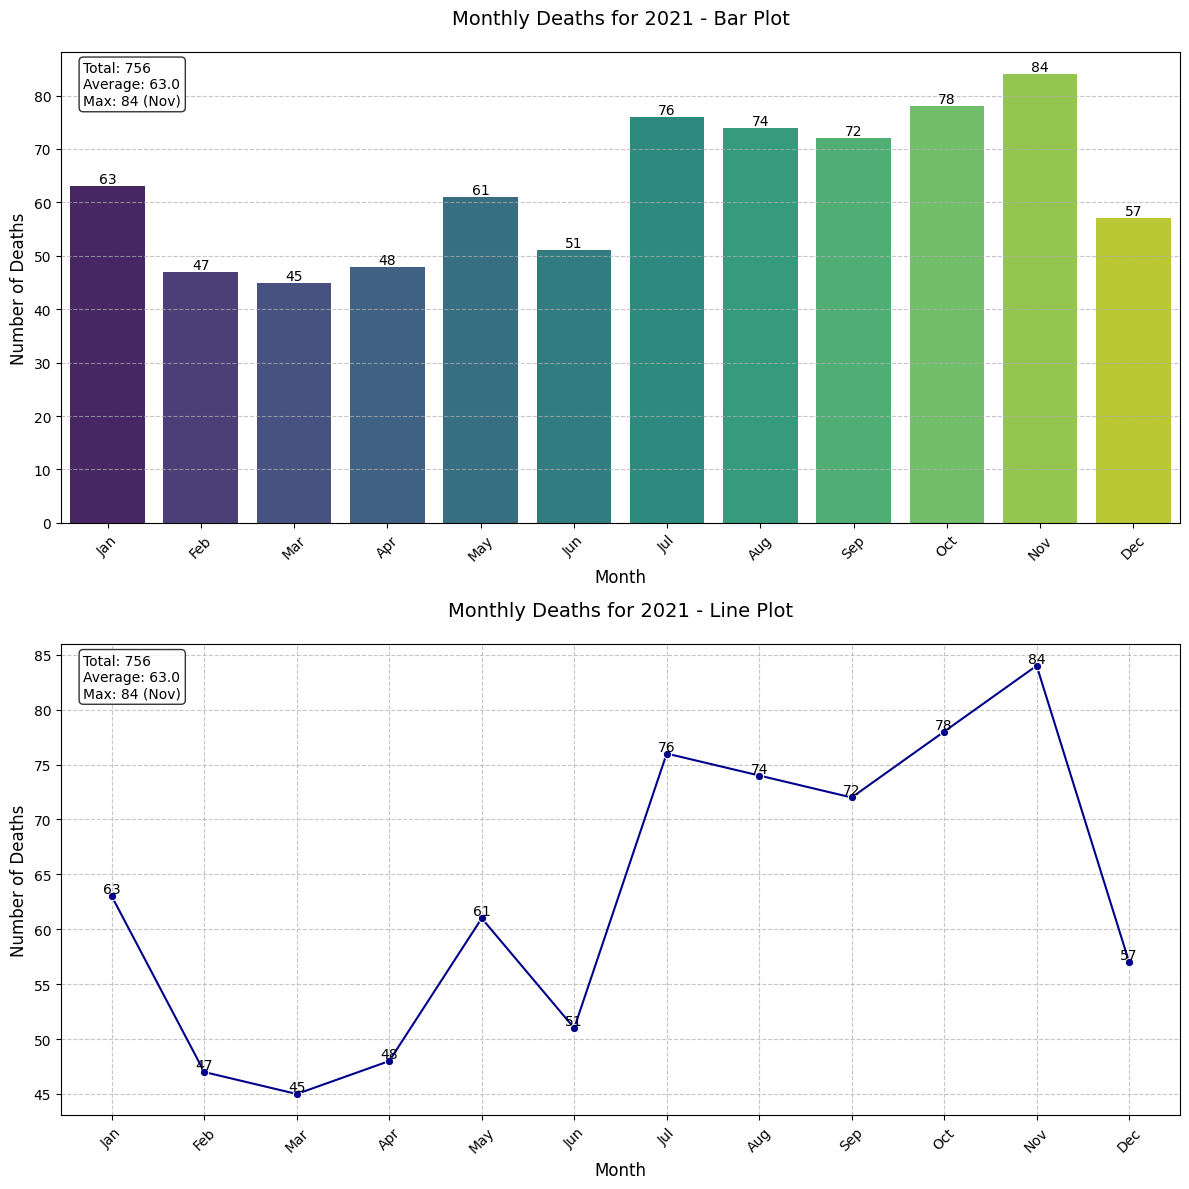


Summary for 2021:
Total deaths: 756
Average deaths per month: 63.0
Highest month: Nov (84 deaths)
Lowest month: Mar (45 deaths)
--------------------------------------------------


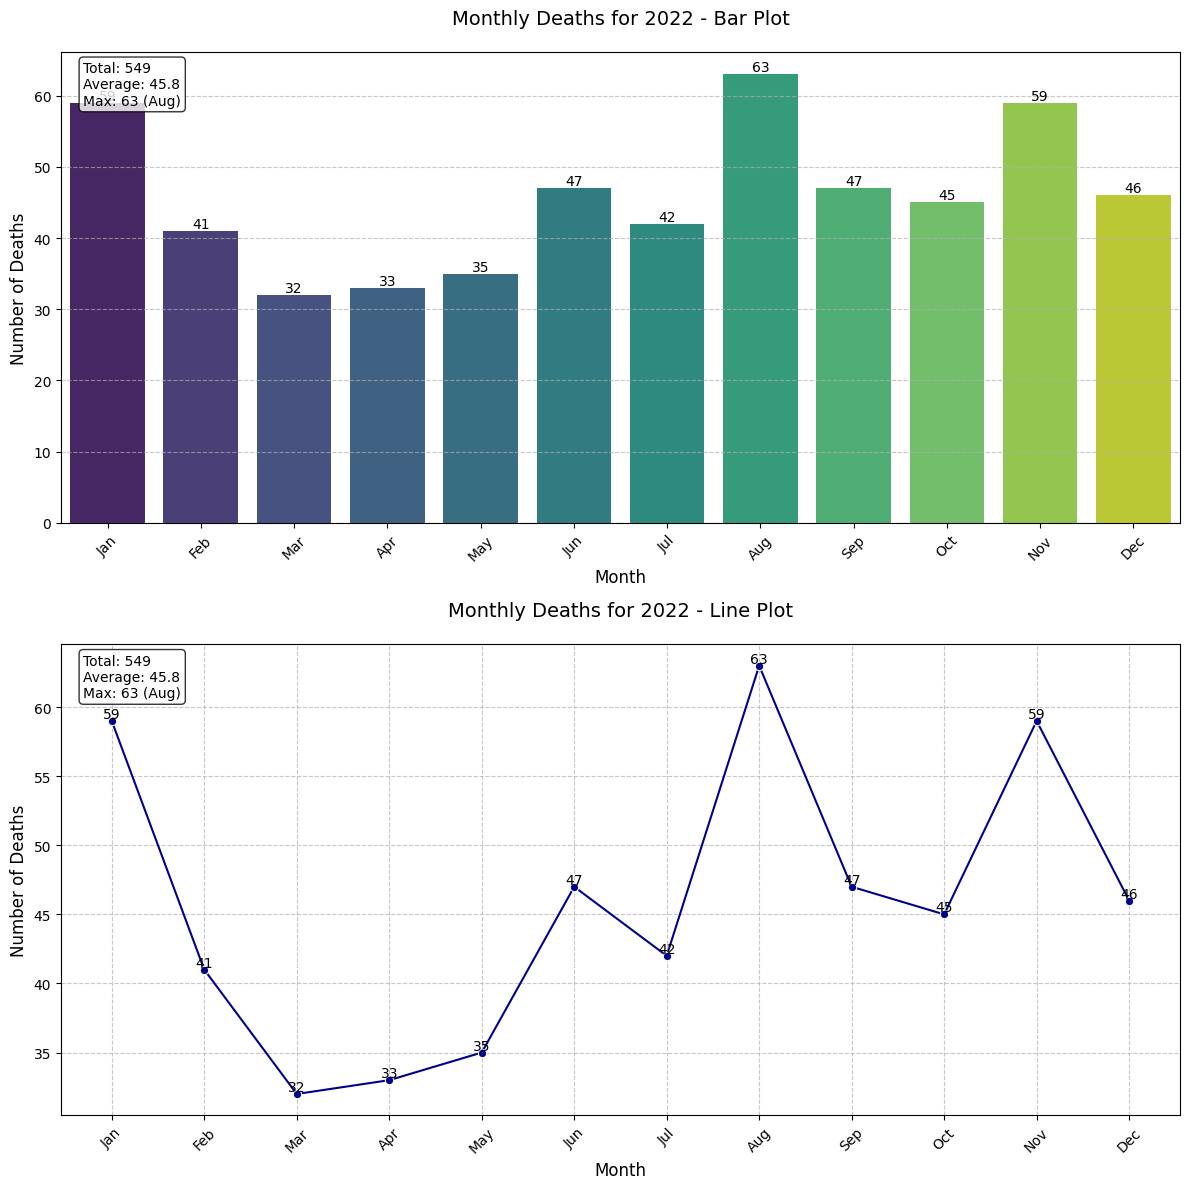


Summary for 2022:
Total deaths: 549
Average deaths per month: 45.8
Highest month: Aug (63 deaths)
Lowest month: Mar (32 deaths)
--------------------------------------------------


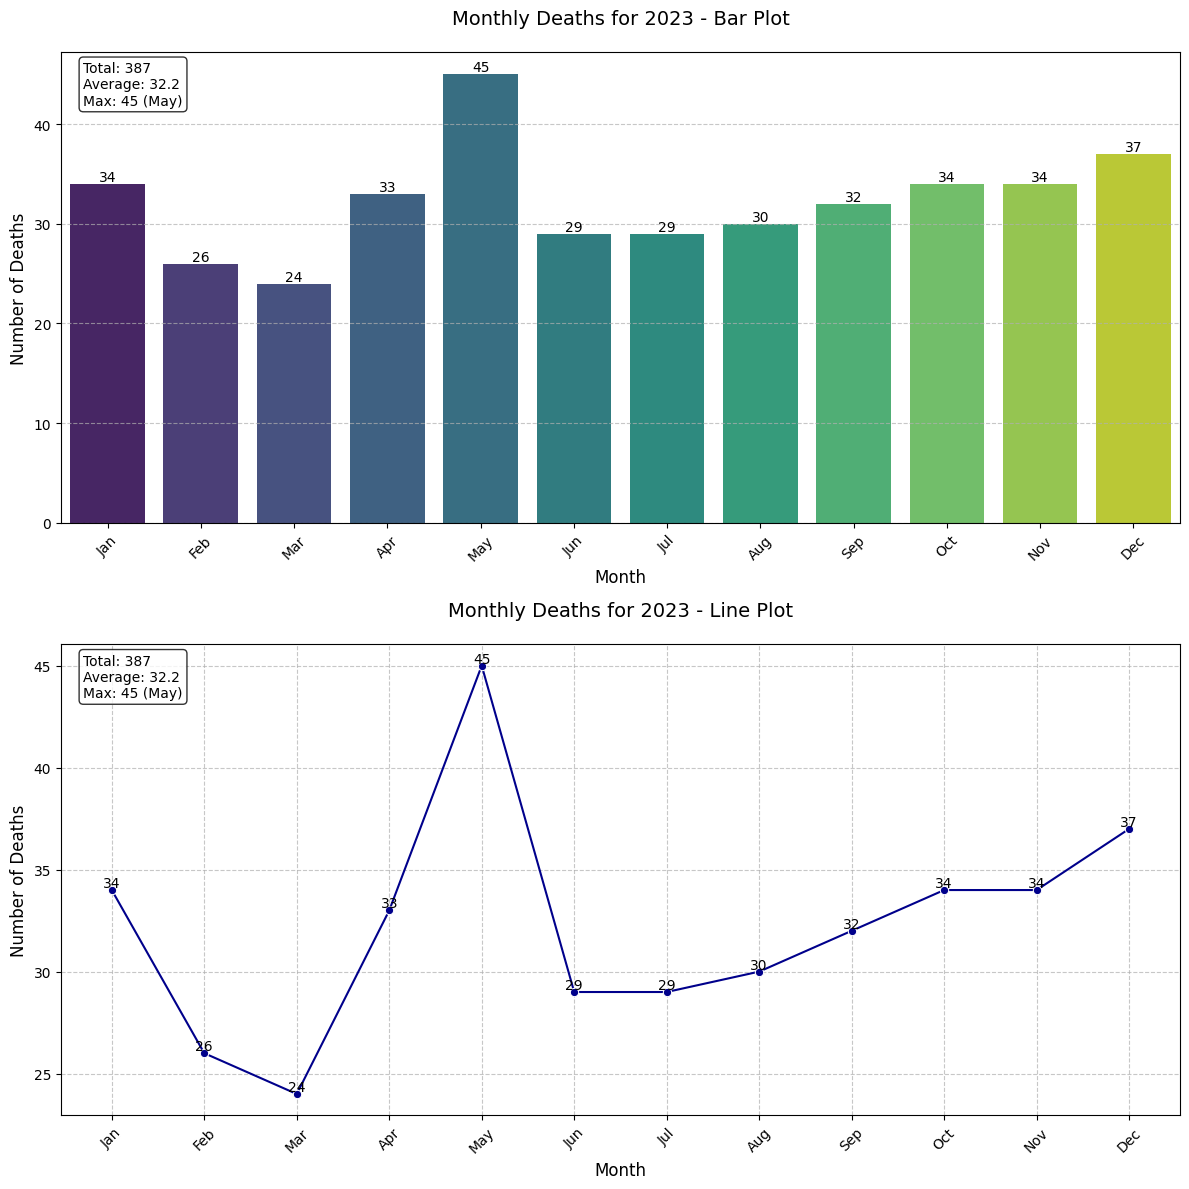


Summary for 2023:
Total deaths: 387
Average deaths per month: 32.2
Highest month: May (45 deaths)
Lowest month: Mar (24 deaths)
--------------------------------------------------


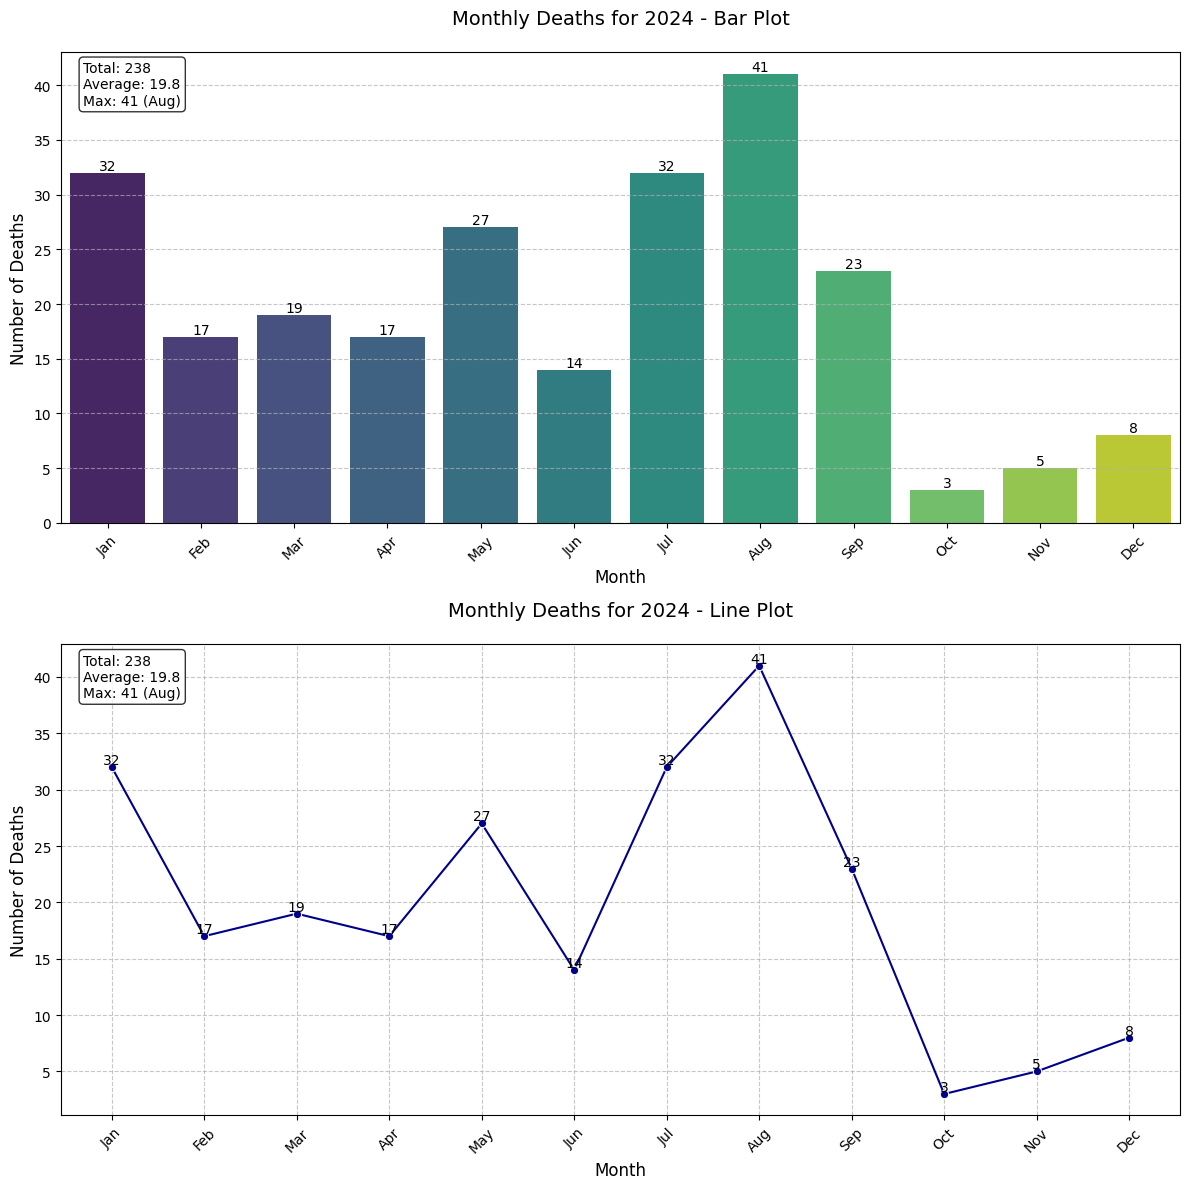


Summary for 2024:
Total deaths: 238
Average deaths per month: 19.8
Highest month: Aug (41 deaths)
Lowest month: Oct (3 deaths)
--------------------------------------------------


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_yearly_deaths(df, date_column='Date of Death'):
    """
    Create separate monthly bar and line plots for each year in the dataset.

    Parameters:
    df (pandas.DataFrame): DataFrame containing the date column
    date_column (str): Name of the date column
    """
    # Create a copy and ensure date column is datetime
    df_copy = df.copy()
    if not pd.api.types.is_datetime64_any_dtype(df_copy[date_column]):
        df_copy[date_column] = pd.to_datetime(df_copy[date_column], errors='coerce')

    # Extract year and month
    df_copy['Year'] = df_copy[date_column].dt.year
    df_copy['Month'] = df_copy[date_column].dt.month

    # Group by year and month
    grouped_data = df_copy.groupby(['Year', 'Month']).size().reset_index(name='Count')

    # Dictionary for month names
    month_names = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                  7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

    # Get unique years
    years = sorted(grouped_data['Year'].unique())

    # Create plots for each year
    for year in years:
        # Filter data for the current year
        year_data = grouped_data[grouped_data['Year'] == year].copy()

        # Add month names
        year_data['Month_Name'] = year_data['Month'].map(month_names)

        # Create figure with two subplots
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

        # Bar Plot
        sns.barplot(data=year_data,
                   x='Month_Name',
                   y='Count',
                   palette='viridis',
                   ax=ax1,
                   order=[month_names[i] for i in range(1, 13)])

        # Customize bar plot
        ax1.set_title(f'Monthly Deaths for {int(year)} - Bar Plot', pad=20, fontsize=14)
        ax1.set_xlabel('Month', fontsize=12)
        ax1.set_ylabel('Number of Deaths', fontsize=12)

        # Add value labels on top of bars
        for i, v in enumerate(year_data['Count']):
            ax1.text(i, v, str(v), ha='center', va='bottom')

        # Add grid for bar plot
        ax1.grid(axis='y', linestyle='--', alpha=0.7)
        ax1.tick_params(axis='x', rotation=45)

        # Line Plot
        sns.lineplot(data=year_data,
                    x='Month_Name',
                    y='Count',
                    marker='o',
                    color='darkblue',
                    ax=ax2,
                    sort=False)

        # Customize line plot
        ax2.set_title(f'Monthly Deaths for {int(year)} - Line Plot', pad=20, fontsize=14)
        ax2.set_xlabel('Month', fontsize=12)
        ax2.set_ylabel('Number of Deaths', fontsize=12)

        # Add value labels for line plot
        for i, v in enumerate(year_data['Count']):
            ax2.text(i, v, str(v), ha='center', va='bottom')

        # Add grid for line plot
        ax2.grid(True, linestyle='--', alpha=0.7)
        ax2.tick_params(axis='x', rotation=45)

        # Add summary statistics box
        summary_text = (f'Total: {year_data["Count"].sum():,}\n'
                       f'Average: {year_data["Count"].mean():.1f}\n'
                       f'Max: {year_data["Count"].max():,} ({month_names[year_data.loc[year_data["Count"].idxmax(), "Month"]]})')

        # Add text box to both plots
        for ax in [ax1, ax2]:
            ax.text(0.02, 0.98, summary_text,
                   transform=ax.transAxes,
                   verticalalignment='top',
                   bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Adjust layout
        plt.tight_layout()

        # Show plots
        plt.show()

        # Print summary for each year
        print(f"\nSummary for {int(year)}:")
        print(f"Total deaths: {year_data['Count'].sum():,}")
        print(f"Average deaths per month: {year_data['Count'].mean():.1f}")
        print(f"Highest month: {month_names[year_data.loc[year_data['Count'].idxmax(), 'Month']]} ({year_data['Count'].max():,} deaths)")
        print(f"Lowest month: {month_names[year_data.loc[year_data['Count'].idxmin(), 'Month']]} ({year_data['Count'].min():,} deaths)")
        print("-" * 50)

# Example usage:
plot_yearly_deaths(df)

## District wise cause of deaths



In [ ]:
# Replace 0 with 'unknown' in the 'When did death occur' column
df['When did death occur'] = df['When did death occur'].replace("0", 'Unknown')

# Verify the changes
print(df['When did death occur'].value_counts())

When did death occur
Within 42 days after delivery                       5492
During Pregnancy                                    3053
During delivery                                     2163
Unknown                                              341
During abortion or within 6 weeks after abortion     170
Name: count, dtype: int64


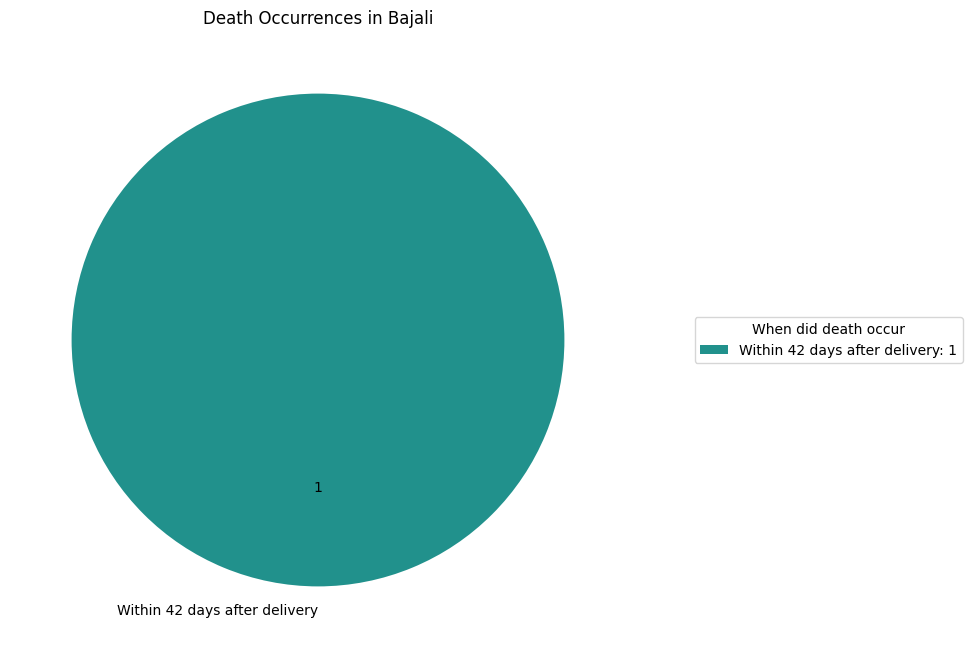

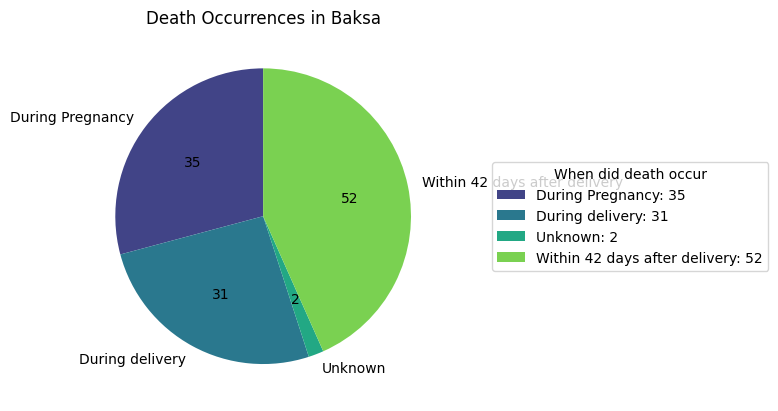

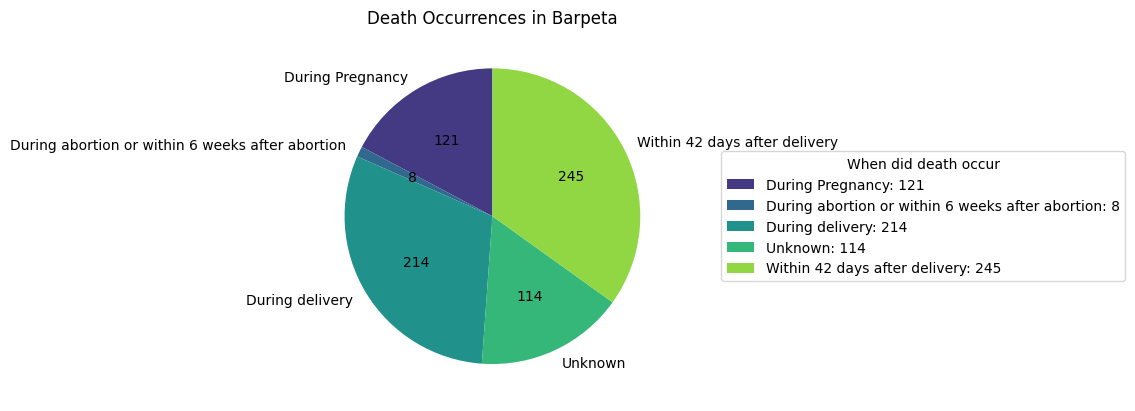

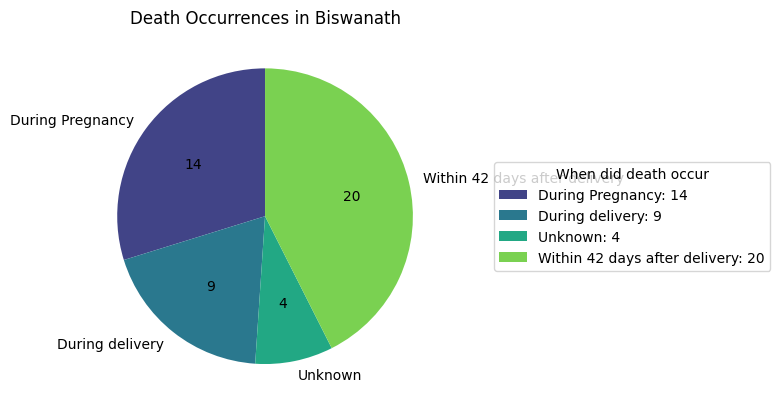

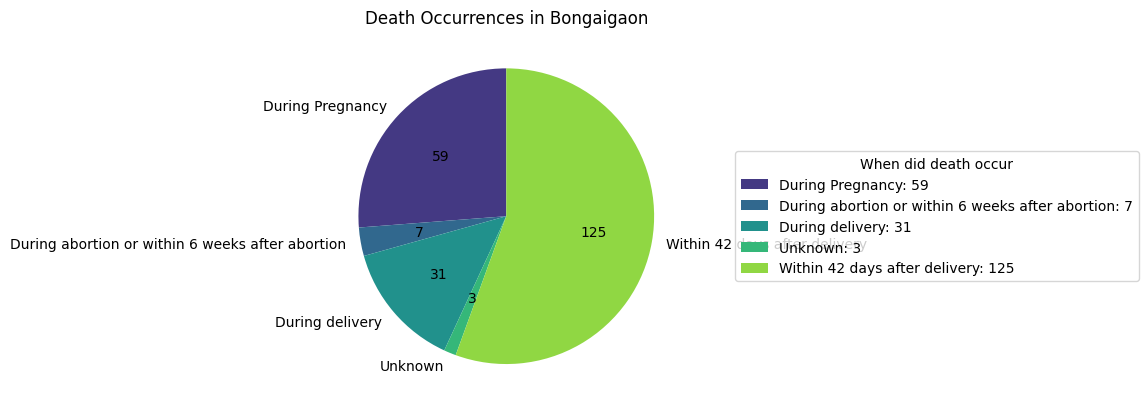

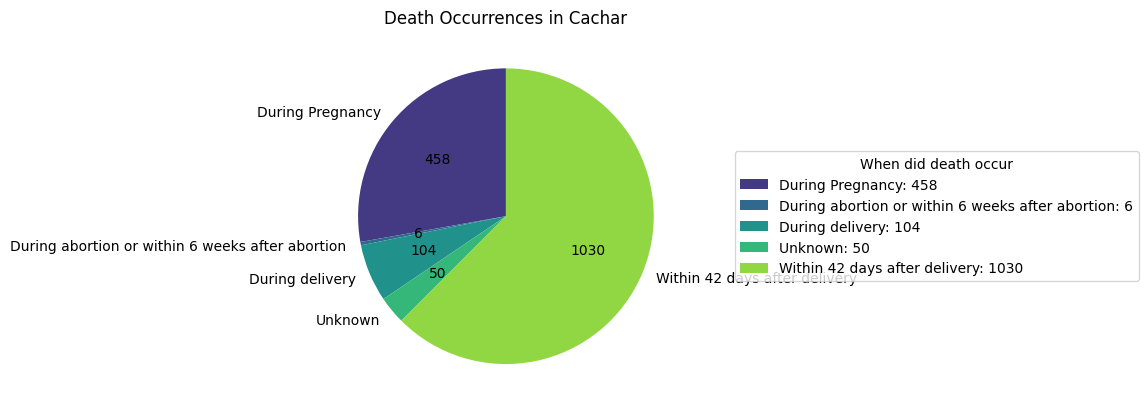

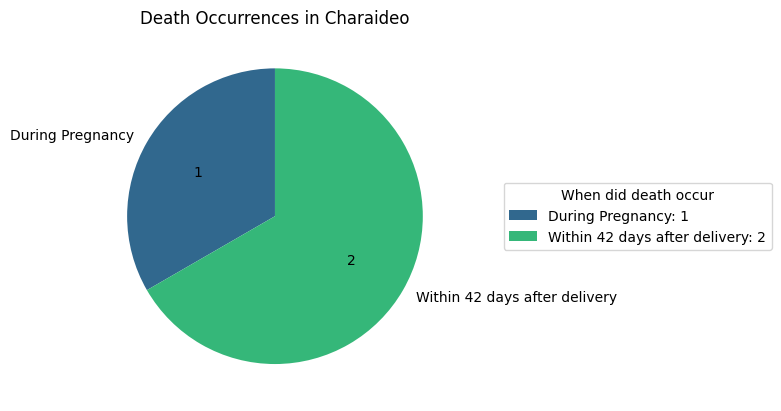

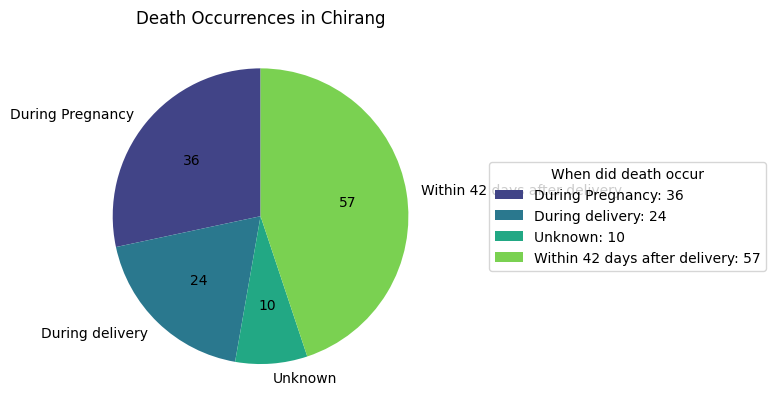

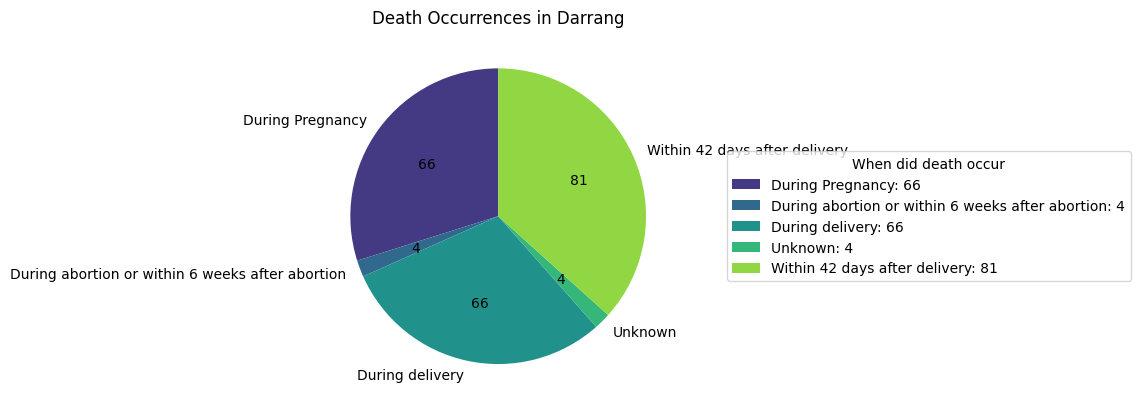

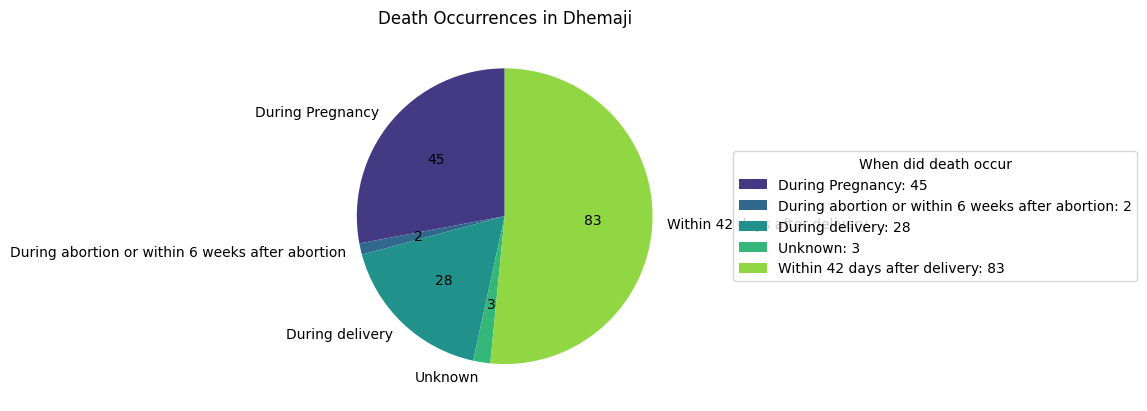

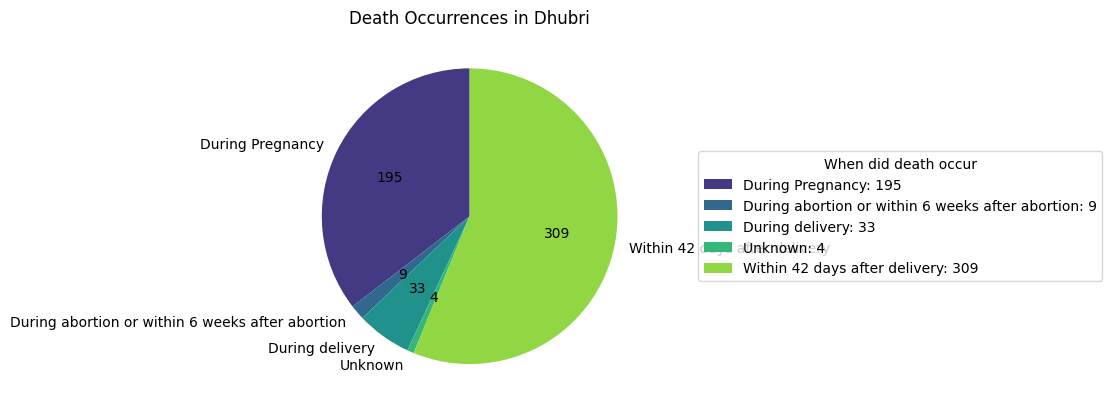

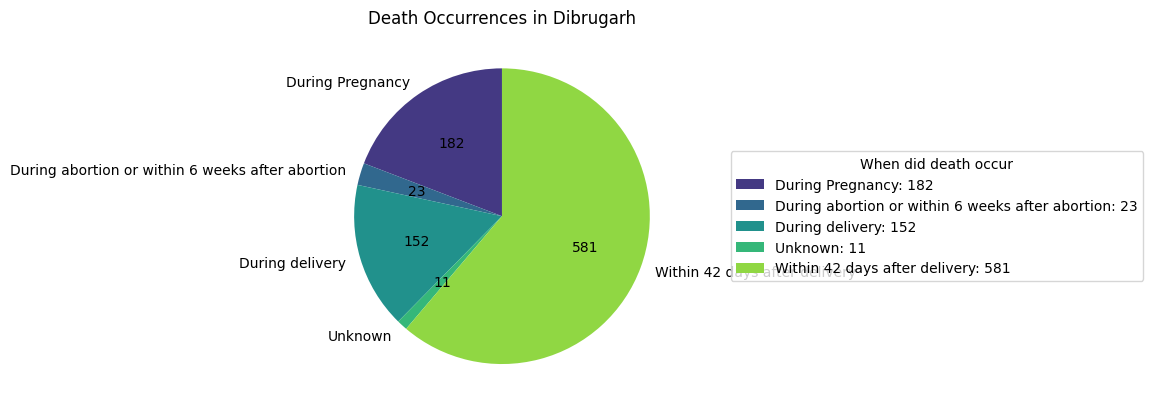

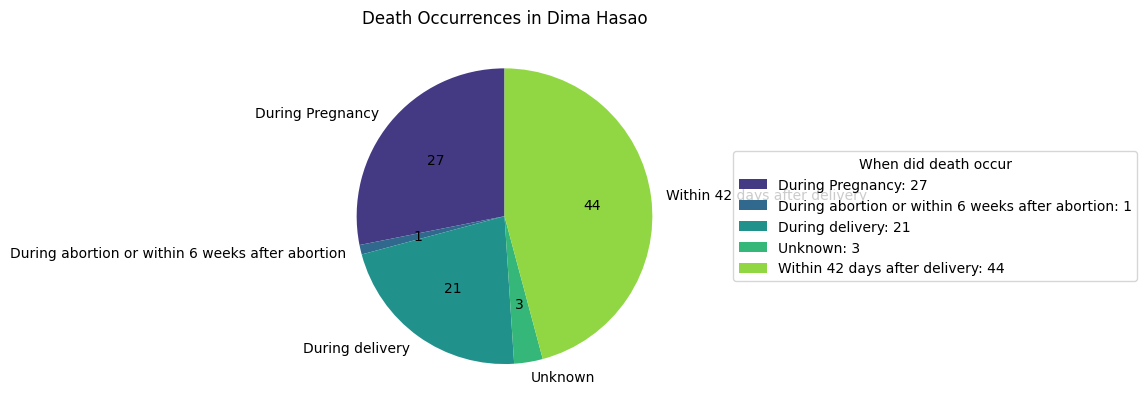

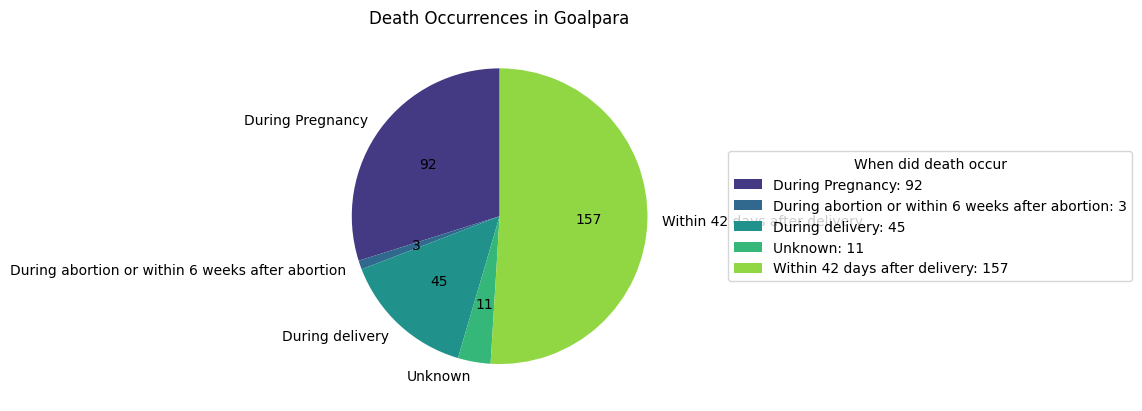

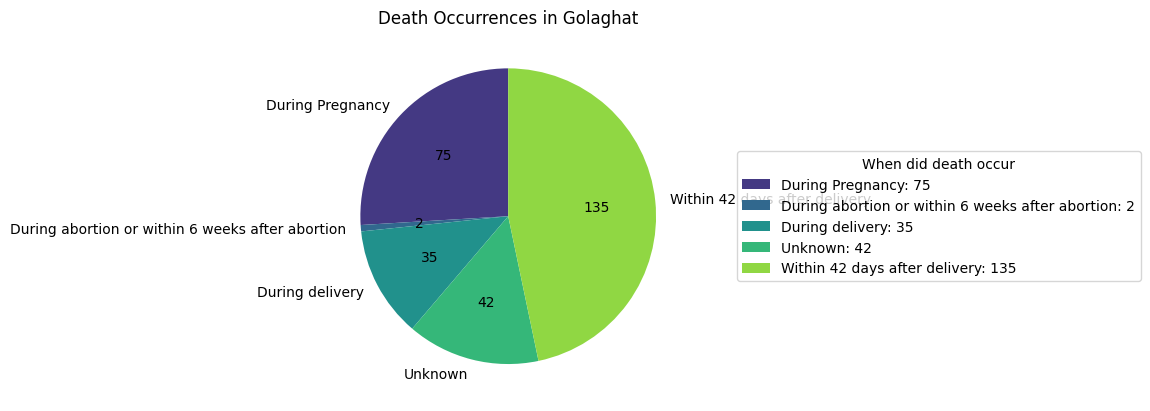

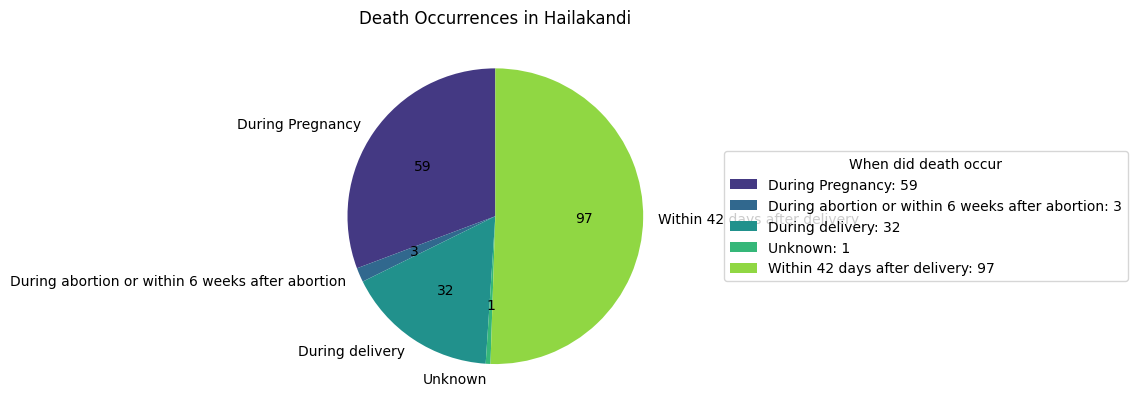

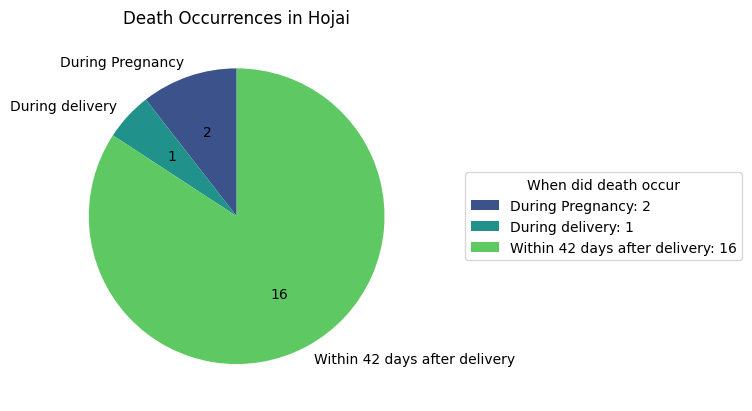

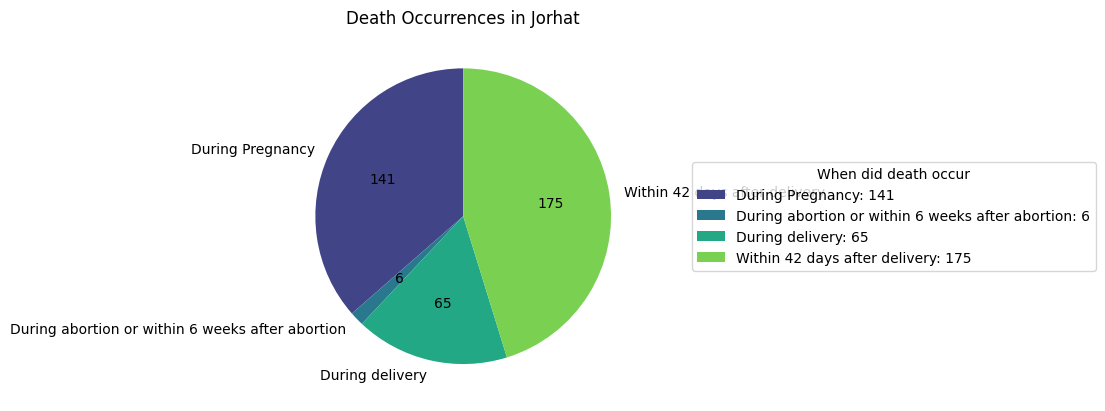

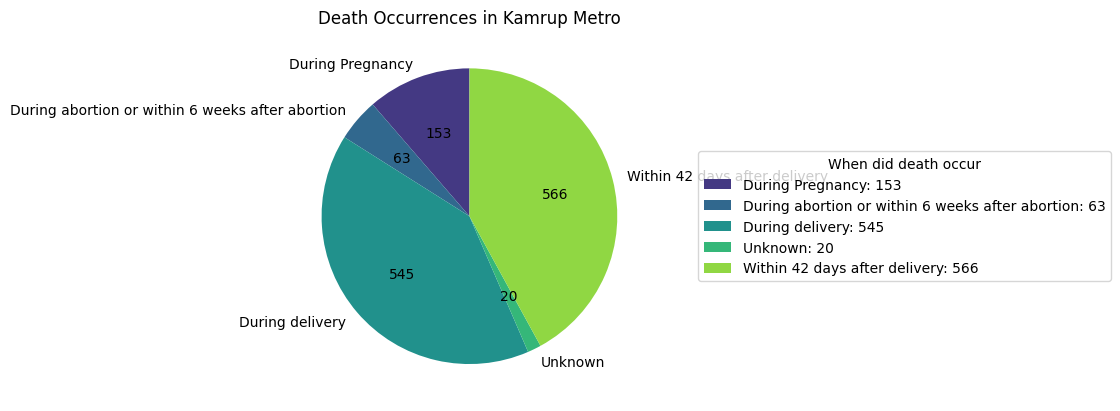

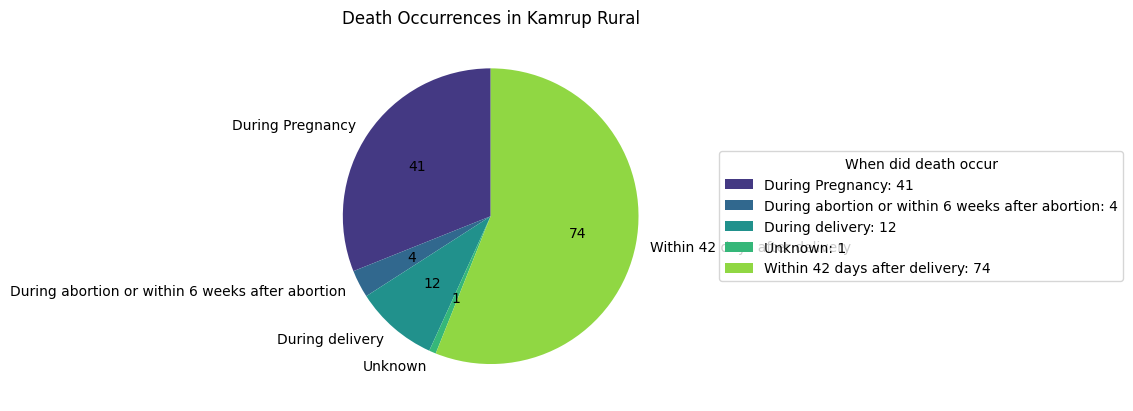

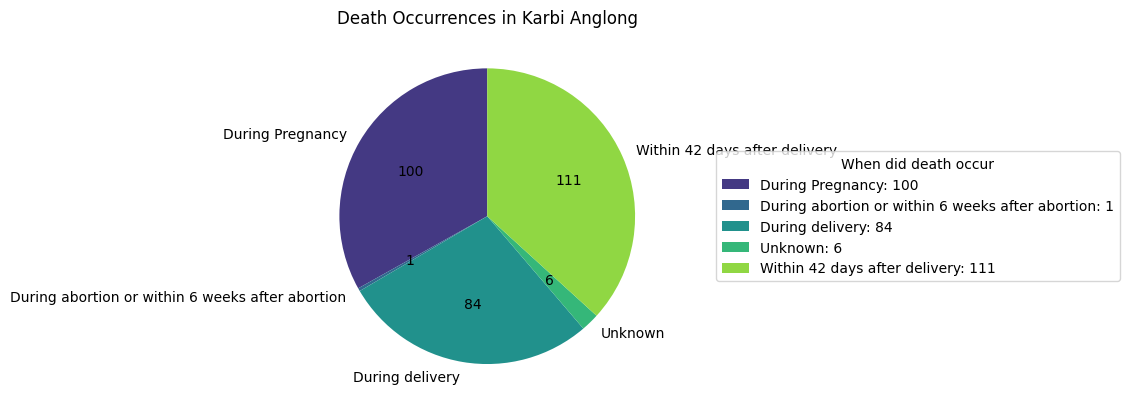

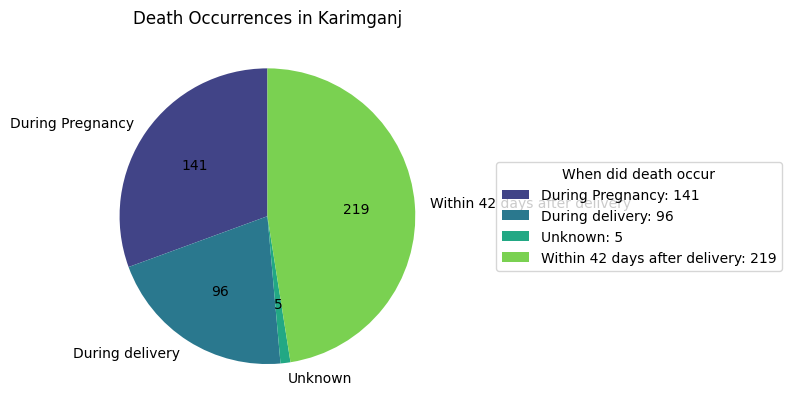

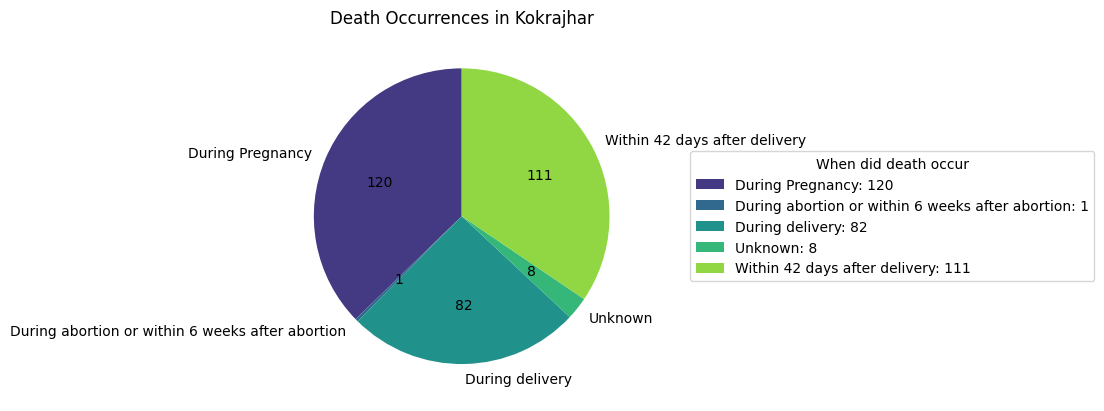

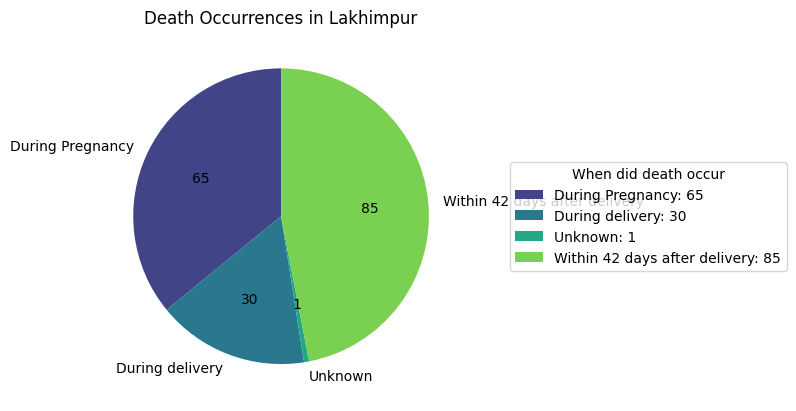

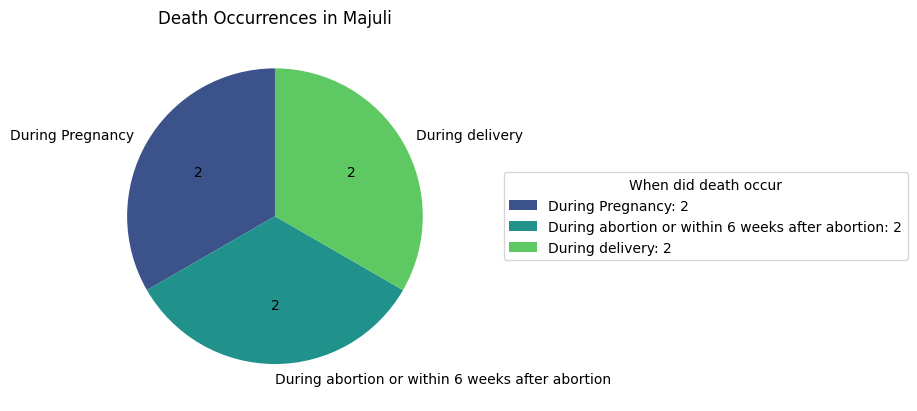

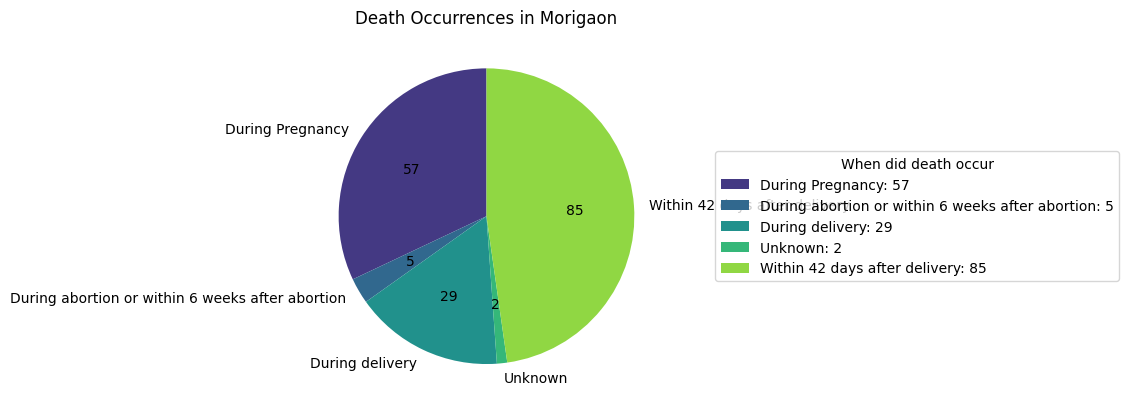

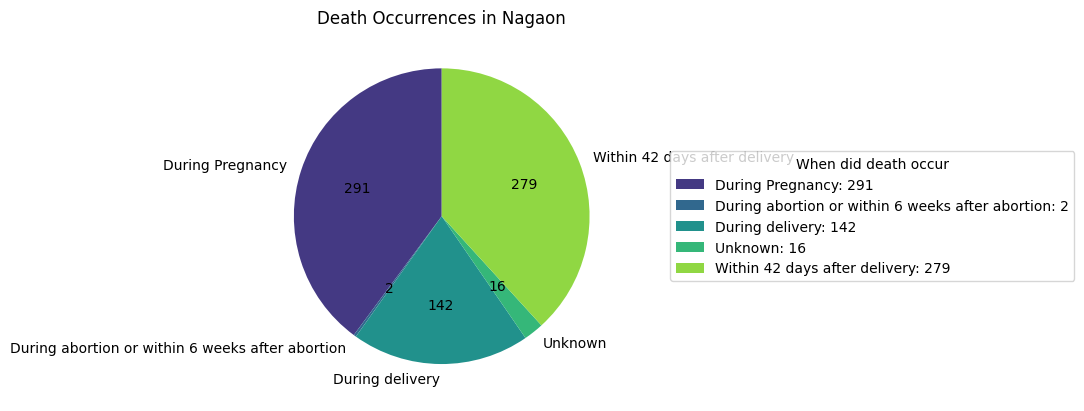

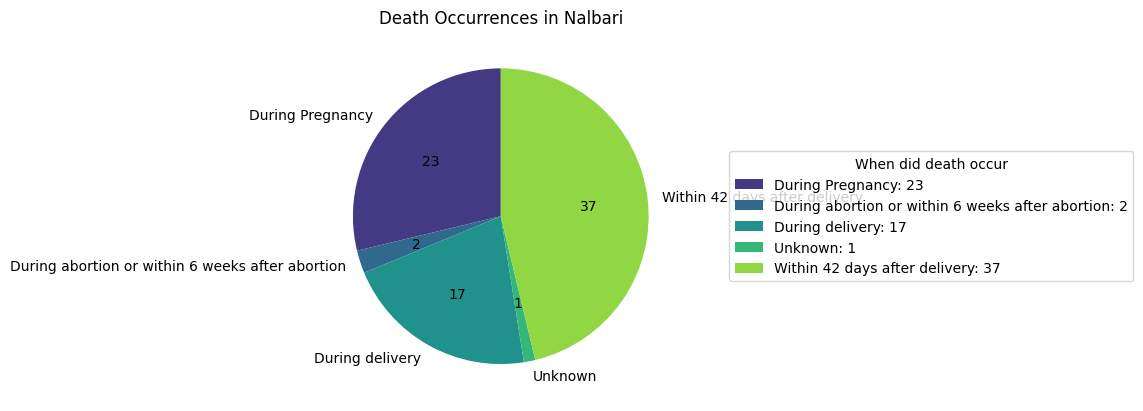

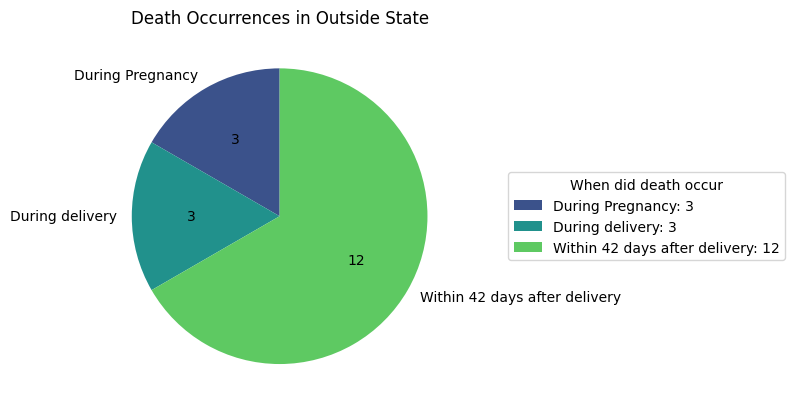

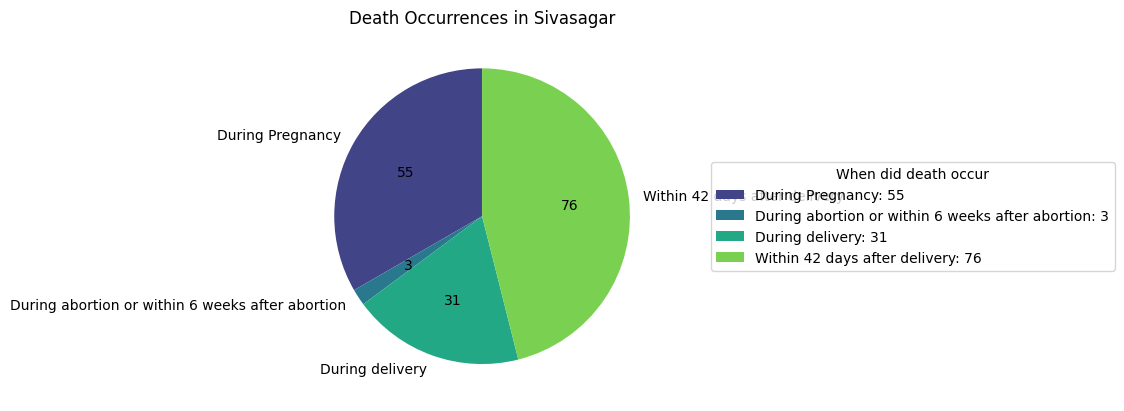

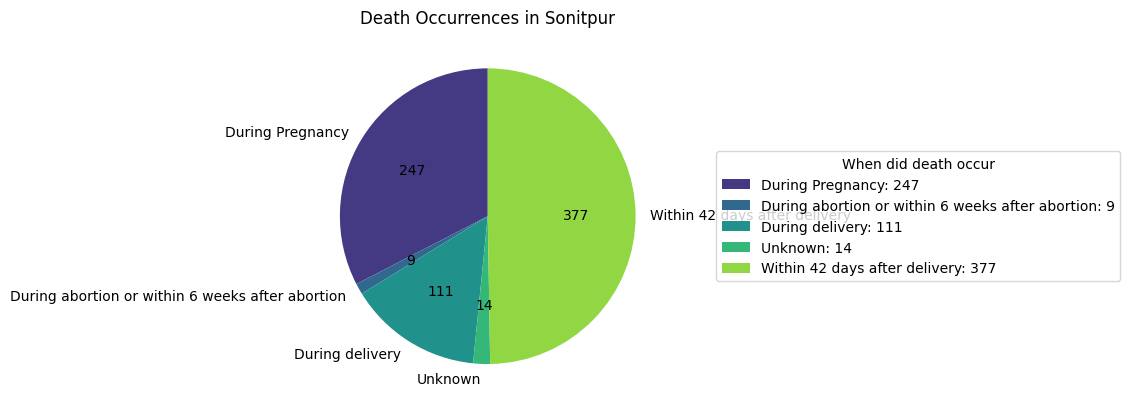

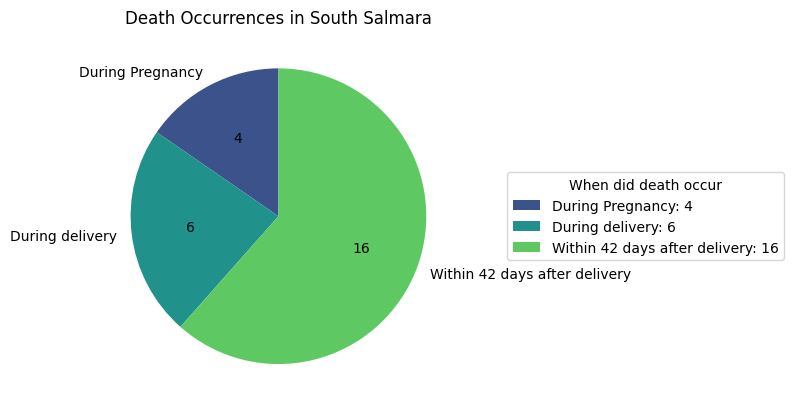

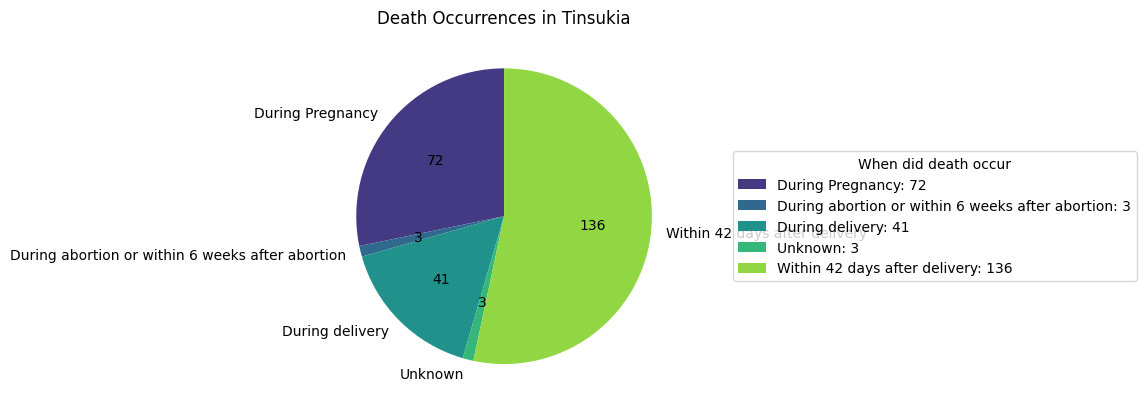

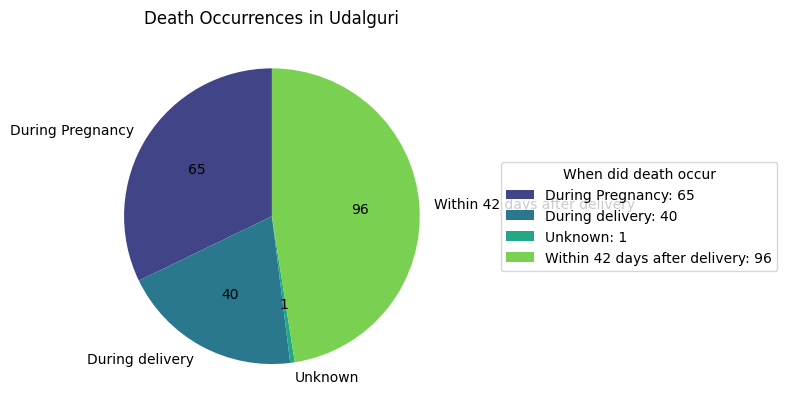

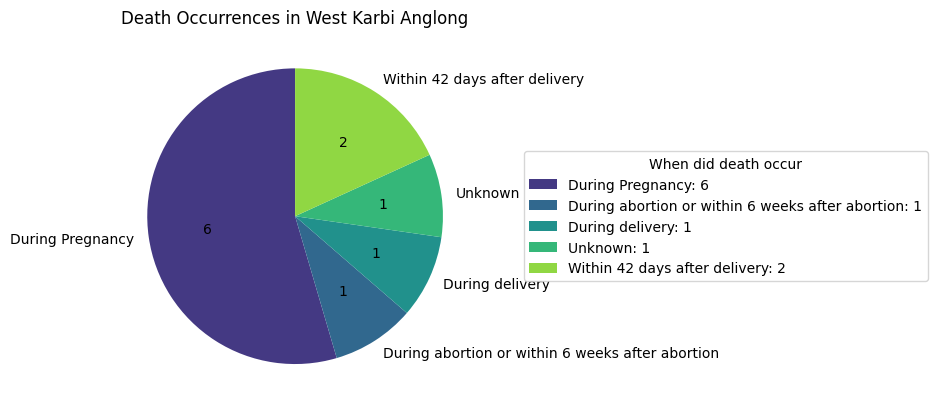

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Reporting District' and 'When did death occur' and count occurrences
district_when_death_occurred = df.groupby(['Reporting District', 'When did death occur']).size().reset_index(name='Count')

# Plot the pie chart for each Reporting District
plt.figure(figsize=(12, 8))

for district in district_when_death_occurred['Reporting District'].unique():
    # Filter data for each Reporting District
    district_data = district_when_death_occurred[district_when_death_occurred['Reporting District'] == district]

    # Plot the pie chart
    wedges, texts, autotexts = plt.pie(district_data['Count'], labels=district_data['When did death occur'], autopct='', startangle=90, colors=sns.color_palette('viridis', len(district_data)))

    # Add actual numbers on the pie chart
    for i, autotext in enumerate(autotexts):
        autotext.set_text(f'{district_data["Count"].iloc[i]}')  # Display the actual count of deaths

    # Add a title for each pie chart
    plt.title(f"Death Occurrences in {district}")

    # Add the legend with the actual counts, shifting the legend to the right
    plt.legend(wedges, [f"{label}: {count}" for label, count in zip(district_data['When did death occur'], district_data['Count'])],
               title="When did death occur", loc="center left", bbox_to_anchor=(1.1, 0.5))  # Adjusted to shift right

    # Display the pie chart
    plt.show()


## Count of Deaths vs Time

In [ ]:
df['Time of Death'].value_counts()

Time of Death
1:00 AM     417
3:00 PM     162
4:00 PM     162
5:00 PM     151
10:00 AM    147
           ... 
12:11 PM      1
9:37 PM       1
6:32 PM       1
4:41 AM       1
1:14 AM       1
Name: count, Length: 866, dtype: int64

In [ ]:
import pandas as pd

# Assuming the 'Time of Death' is in 'HH:MM' format
# First, convert the 'Time of Death' to datetime format if it's not already
df['Time of Death 24 hour format'] = pd.to_datetime(df['Time of Death'], errors='coerce').dt.hour


def categorize_time(hour):
    if 0 <= hour < 1:
        return '00:00 - 01:00'
    elif 1 <= hour < 2:
        return '01:00 - 02:00'
    elif 2 <= hour < 3:
        return '02:00 - 03:00'
    elif 3 <= hour < 4:
        return '03:00 - 04:00'
    elif 4 <= hour < 5:
        return '04:00 - 05:00'
    elif 5 <= hour < 6:
        return '05:00 - 06:00'
    elif 6 <= hour < 7:
        return '06:00 - 07:00'
    elif 7 <= hour < 8:
        return '07:00 - 08:00'
    elif 8 <= hour < 9:
        return '08:00 - 09:00'
    elif 9 <= hour < 10:
        return '09:00 - 10:00'
    elif 10 <= hour < 11:
        return '10:00 - 11:00'
    elif 11 <= hour < 12:
        return '11:00 - 12:00'
    elif 12 <= hour < 13:
        return '12:00 - 13:00'
    elif 13 <= hour < 14:
        return '13:00 - 14:00'
    elif 14 <= hour < 15:
        return '14:00 - 15:00'
    elif 15 <= hour < 16:
        return '15:00 - 16:00'
    elif 16 <= hour < 17:
        return '16:00 - 17:00'
    elif 17 <= hour < 18:
        return '17:00 - 18:00'
    elif 18 <= hour < 19:
        return '18:00 - 19:00'
    elif 19 <= hour < 20:
        return '19:00 - 20:00'
    elif 20 <= hour < 21:
        return '20:00 - 21:00'
    elif 21 <= hour < 22:
        return '21:00 - 22:00'
    elif 22 <= hour < 23:
        return '22:00 - 23:00'
    else:
        return '23:00 - 00:00'

# Apply the function to categorize the time
df['Time Range'] = df['Time of Death 24 hour format'].apply(categorize_time)

# Get the value counts for each time range
time_range_counts = df['Time Range'].value_counts().sort_index()

# Display the counts for each time range
print(time_range_counts)


Time Range
00:00 - 01:00    342
01:00 - 02:00    721
02:00 - 03:00    392
03:00 - 04:00    385
04:00 - 05:00    401
05:00 - 06:00    373
06:00 - 07:00    473
07:00 - 08:00    485
08:00 - 09:00    481
09:00 - 10:00    472
10:00 - 11:00    497
11:00 - 12:00    476
12:00 - 13:00    448
13:00 - 14:00    448
14:00 - 15:00    560
15:00 - 16:00    550
16:00 - 17:00    541
17:00 - 18:00    510
18:00 - 19:00    412
19:00 - 20:00    448
20:00 - 21:00    436
21:00 - 22:00    421
22:00 - 23:00    459
23:00 - 00:00    488
Name: count, dtype: int64


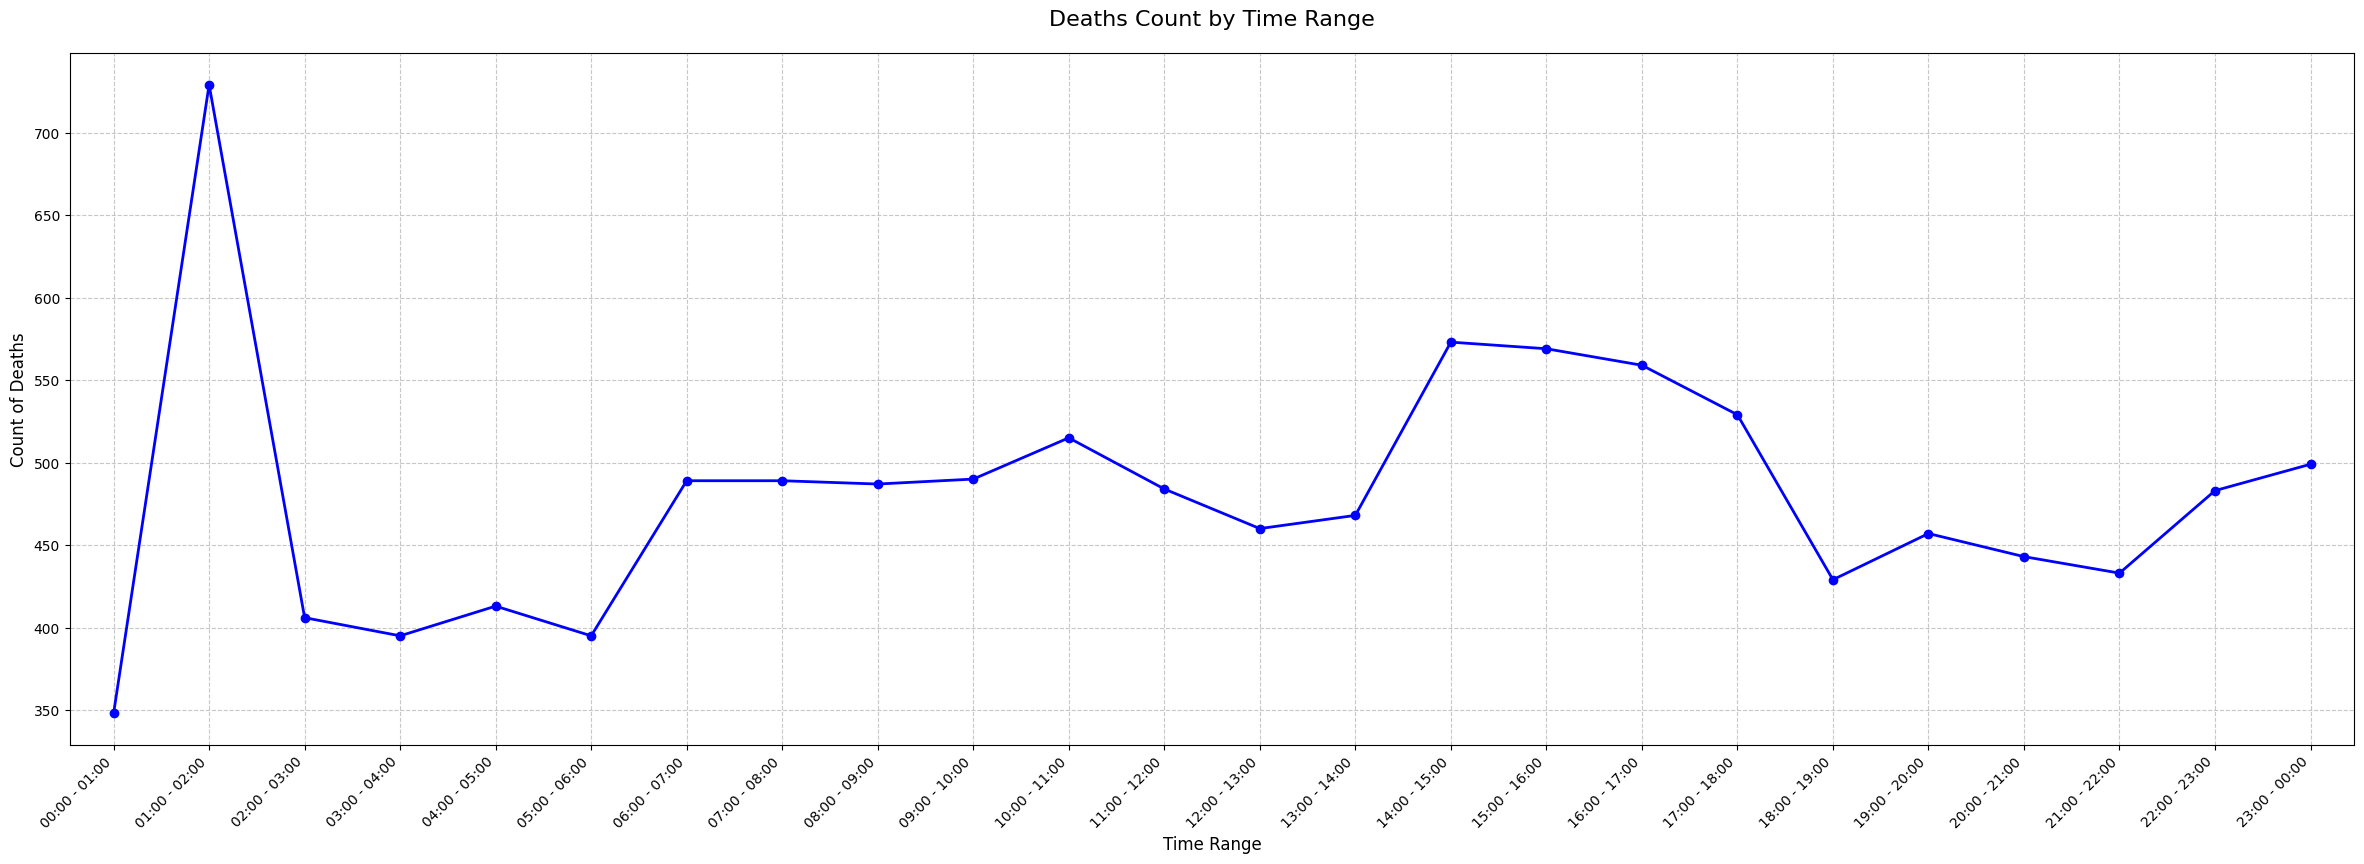

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample time range counts
time_range_counts = {
    '00:00 - 01:00': 348,
    '01:00 - 02:00': 729,
    '02:00 - 03:00': 406,
    '03:00 - 04:00': 395,
    '04:00 - 05:00': 413,
    '05:00 - 06:00': 395,
    '06:00 - 07:00': 489,
    '07:00 - 08:00': 489,
    '08:00 - 09:00': 487,
    '09:00 - 10:00': 490,
    '10:00 - 11:00': 515,
    '11:00 - 12:00': 484,
    '12:00 - 13:00': 460,
    '13:00 - 14:00': 468,
    '14:00 - 15:00': 573,
    '15:00 - 16:00': 569,
    '16:00 - 17:00': 559,
    '17:00 - 18:00': 529,
    '18:00 - 19:00': 429,
    '19:00 - 20:00': 457,
    '20:00 - 21:00': 443,
    '21:00 - 22:00': 433,
    '22:00 - 23:00': 483,
    '23:00 - 00:00': 499
}

# Convert the dictionary to a pandas Series for easier plotting
time_range_counts_series = pd.Series(time_range_counts)

# Create figure and axis objects with specified size
plt.figure(figsize=(24, 10))  # Increased height slightly

# Create the plot
ax = time_range_counts_series.plot(
    kind='line',
    marker='o',
    color='b',
    linestyle='-',
    linewidth=2,
    markersize=6
)

# Customize the plot
plt.title('Deaths Count by Time Range', pad=20, fontsize=16)
plt.xlabel('Time Range', fontsize=12)
plt.ylabel('Count of Deaths', fontsize=12)

# Rotate x-axis labels and adjust their position
plt.xticks(
    range(len(time_range_counts)),
    time_range_counts.keys(),
    rotation=45,
    ha='right',
    fontsize=10
)

# Adjust grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add some padding to the bottom to ensure labels don't get cut off
plt.margins(x=0.02)  # Add small horizontal margin

# Adjust the layout with specific padding
plt.tight_layout(pad=2.0, rect=[0, 0.05, 1, 0.95])

# Show the plot
plt.show()

## Deaths by Age

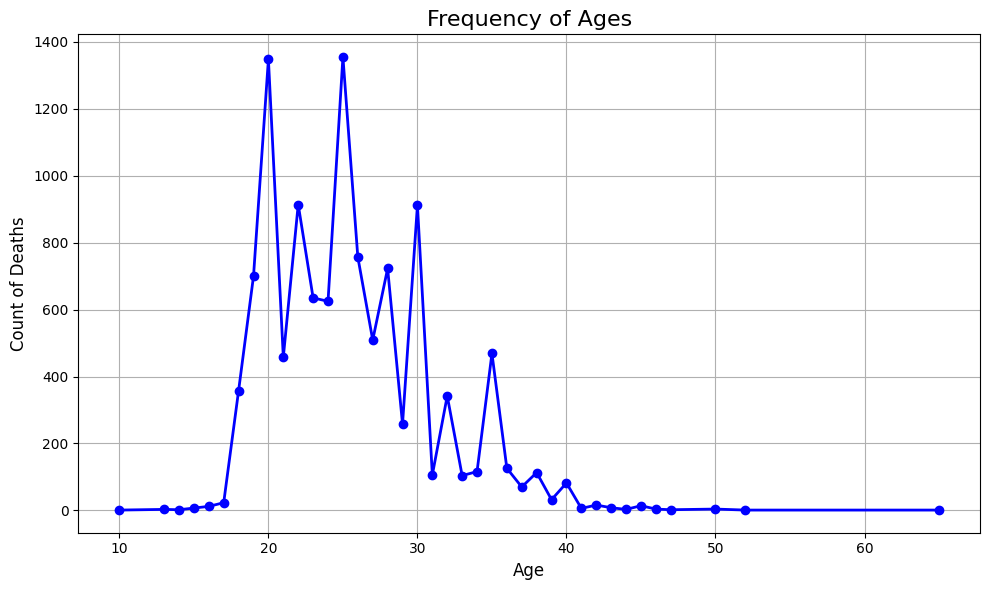

In [ ]:
age_counts = df['Age'].value_counts().sort_index()  # Sort index to keep age in ascending order

# Plotting the line graph
plt.figure(figsize=(10, 6))  # Adjust figure size for better readability
age_counts.plot(kind='line', marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels and title
plt.title('Frequency of Ages', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count of Deaths', fontsize=12)

# Display grid
plt.grid(True)

# Show the plot
plt.tight_layout()  # Adjust layout to make sure everything fits well
plt.show()

In [ ]:
df.head()

0 Original District Reporting District           Reporting BPHC  \
1         Dibrugarh          Dibrugarh           Barbaruah BPHC   
2         Dibrugarh          Dibrugarh           Barbaruah BPHC   
3          Sonitpur           Sonitpur  Biswanath Chariali BPHC   
4     Karbi Anglong      Karbi Anglong             Bokajan BPHC   
5        Dima Hasao         Dima Hasao               Mahur BPHC   

0                 Reporting Health Institution Date of Death Time of Death  \
1  Assam Medical College & Hospital, Dibrugarh      28/01/13       1:00 AM   
2  Assam Medical College & Hospital, Dibrugarh      26/01/13       6:00 PM   
3                      Biswanath Chariali SDCH      24/01/13       1:00 AM   
4                                      Unknown      23/01/13       3:00 AM   
5                              Harangajao MPHC      21/01/13       1:30 PM   

0   Age   Place of Death           When did death occur   Cause of Death  \
1  22.0  Health Facility  Within 42 days after delivery           Others   
2  22.0  Health Facility               During Pregnancy           Others   
3  26.0  Health Facility  Within 42 days after delivery           Anemia   
4  29.0           Others                During delivery  Cause not known   
5  22.0  Health Facility  Within 42 days after delivery           Anemia   

0  Time of Death 24 hour format     Time Range  
1                           1.0  01:00 - 02:00  
2                          18.0  18:00 - 19:00  
3                           1.0  01:00 - 02:00  
4                           3.0  03:00 - 04:00  
5                          13.0  13:00 - 14:00

## High Risk Districts by Time of Day

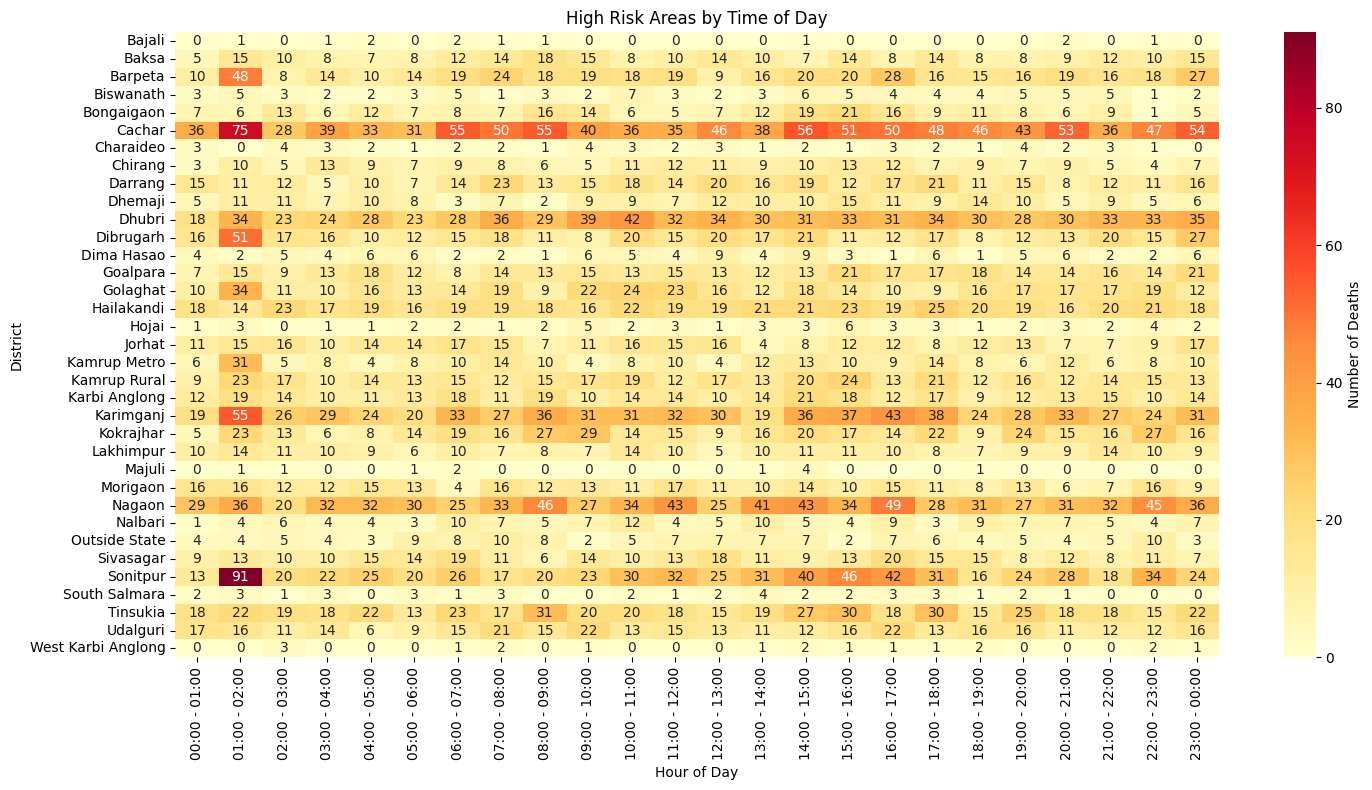

In [ ]:
def create_heatmap_high_risk_areas(df):
    """Create a heatmap of deaths by district and time"""
    plt.figure(figsize=(15, 8))

    # Create pivot table of deaths by district and hour
    district_time_deaths = pd.crosstab(
        df['Original District'],
        df['Time Range']
    )

    # Create heatmap
    sns.heatmap(district_time_deaths,
                cmap='YlOrRd',
                annot=True,
                fmt='d',
                cbar_kws={'label': 'Number of Deaths'})

    plt.title('High Risk Areas by Time of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('District')
    plt.tight_layout()
    plt.show()

create_heatmap_high_risk_areas(df)

## Risk Factor Combinations by Age Group and Place of Death

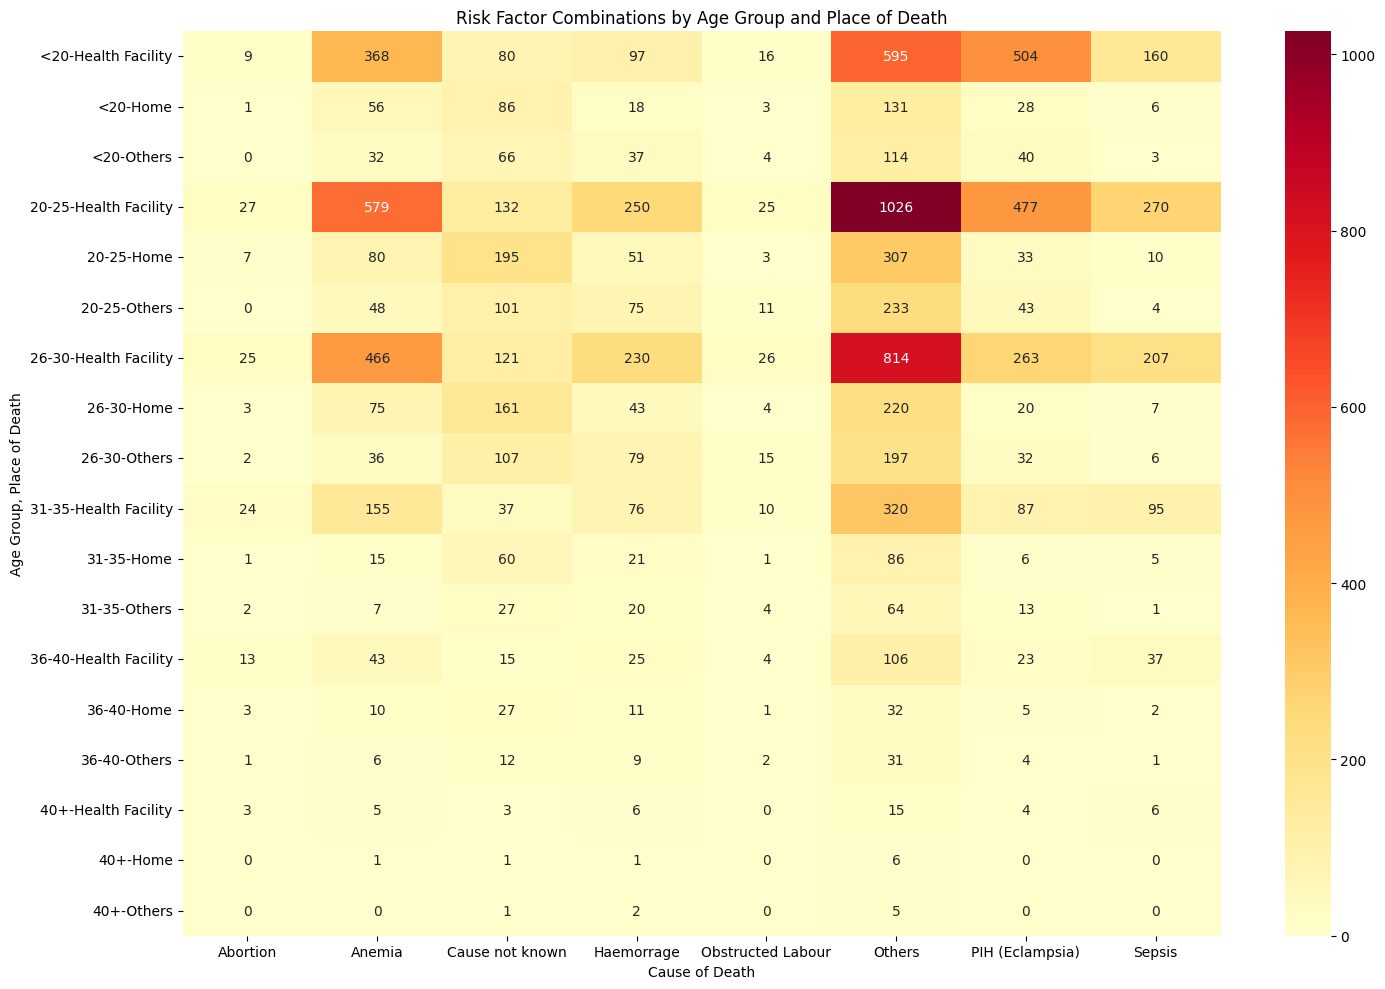

Cause of Death             Abortion  Anemia  Cause not known  Haemorrage  \
Age_Group Place of Death                                                   
<20       Health Facility         9     368               80          97   
          Home                    1      56               86          18   
          Others                  0      32               66          37   
20-25     Health Facility        27     579              132         250   
          Home                    7      80              195          51   
          Others                  0      48              101          75   
26-30     Health Facility        25     466              121         230   
          Home                    3      75              161          43   
          Others                  2      36              107          79   
31-35     Health Facility        24     155               37          76   
          Home                    1      15               60          21   
          Others                  2       7               27          20   
36-40     Health Facility        13      43               15          25   
          Home                    3      10               27          11   
          Others                  1       6               12           9   
40+       Health Facility         3       5                3           6   
          Home                    0       1                1           1   
          Others                  0       0                1           2   

Cause of Death             Obstructed Labour  Others  PIH (Eclampsia)  Sepsis  
Age_Group Place of Death                                                       
<20       Health Facility                 16     595              504     160  
          Home                             3     131               28       6  
          Others                           4     114               40       3  
20-25     Health Facility                 25    1026              477     270  
          Home                             3     307               33      10  
          Others                          11     233               43       4  
26-30     Health Facility                 26     814              263     207  
          Home                             4     220               20       7  
          Others                          15     197               32       6  
31-35     Health Facility                 10     320               87      95  
          Home                             1      86                6       5  
          Others                           4      64               13       1  
36-40     Health Facility                  4     106               23      37  
          Home                             1      32                5       2  
          Others                           2      31                4       1  
40+       Health Facility                  0      15                4       6  
          Home                             0       6                0       0  
          Others                           0       5                0       0

In [ ]:
def identify_risk_combinations(df):
    """
    Identify high-risk combinations of factors using age groups
    """
    # Create age groups
    df['Age_Group'] = pd.cut(df['Age'],
                            bins=[0, 20, 25, 30, 35, 40, 100],
                            labels=['<20', '20-25', '26-30', '31-35', '36-40', '40+'])

    # Create risk factor combinations using age groups
    risk_factors = pd.crosstab(
        [df['Age_Group'], df['Place of Death']],
        df['Cause of Death']
    )

    # Create visualization
    plt.figure(figsize=(15, 10))
    sns.heatmap(risk_factors,
                cmap='YlOrRd',
                annot=True,
                fmt='d')

    plt.title('Risk Factor Combinations by Age Group and Place of Death')
    plt.xlabel('Cause of Death')
    plt.ylabel('Age Group, Place of Death')
    plt.tight_layout()
    plt.show()

    # Return the risk factors dataframe for further analysis if needed
    return risk_factors

identify_risk_combinations(df)

## Seasonal Patterns in Cause of Deaths

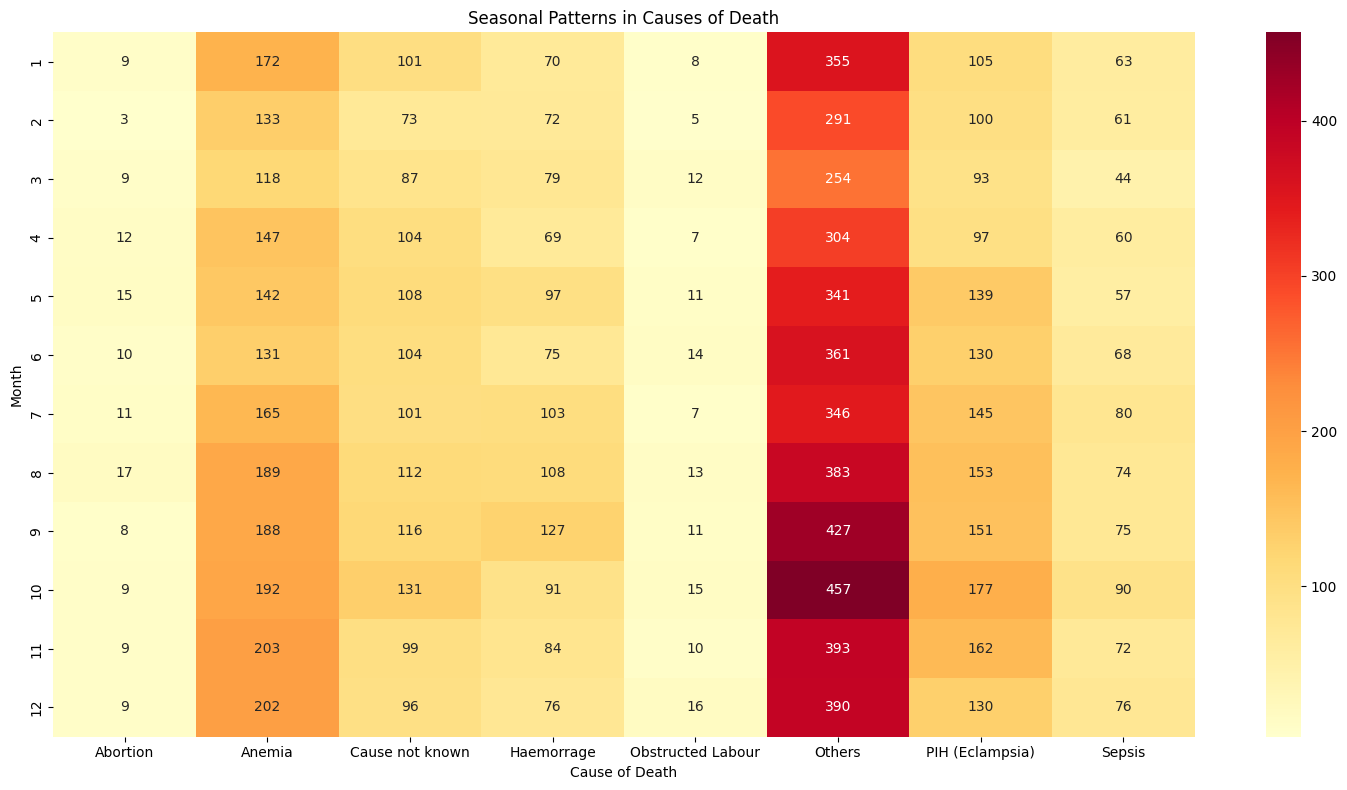

In [ ]:
def seasonal_patterns(df):
    """Analyze seasonal patterns in causes of death"""
    df['Month'] = pd.to_datetime(df['Date of Death']).dt.month

    plt.figure(figsize=(15, 8))
    seasonal_cause = pd.crosstab(
        df['Month'],
        df['Cause of Death']
    )

    sns.heatmap(seasonal_cause,
                cmap='YlOrRd',
                annot=True,
                fmt='d')

    plt.title('Seasonal Patterns in Causes of Death')
    plt.xlabel('Cause of Death')
    plt.ylabel('Month')
    plt.tight_layout()
    plt.show()

seasonal_patterns(df)

## Place of Death vs Cause (%)

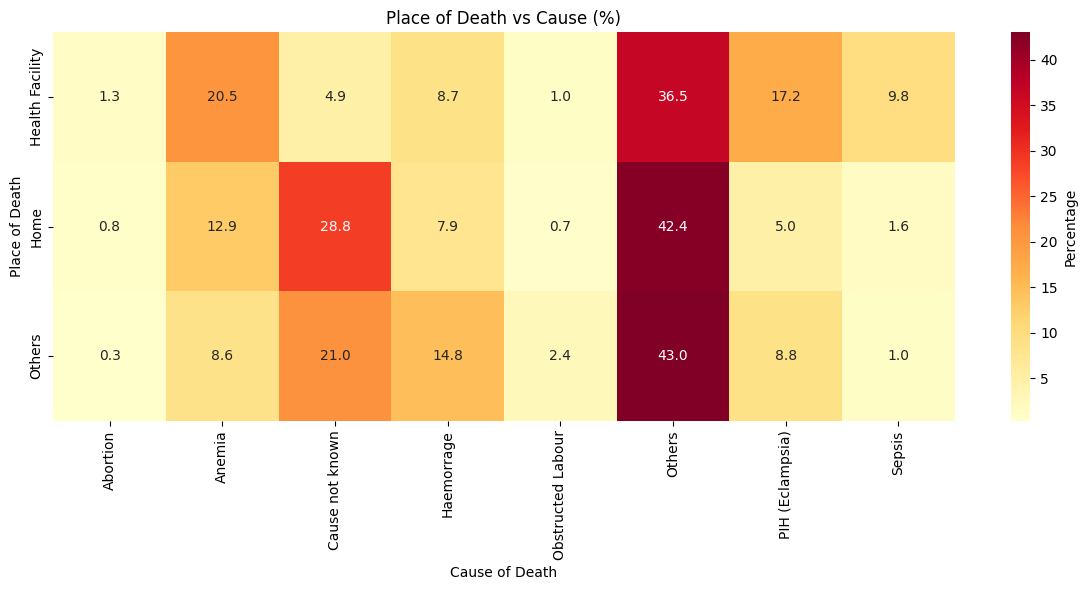

In [ ]:

def place_cause_correlation(df):
    """Analyze correlation between place of death and cause"""
    plt.figure(figsize=(12, 6))

    place_cause = pd.crosstab(
        df['Place of Death'],
        df['Cause of Death'],
        normalize='index'
    ) * 100

    sns.heatmap(place_cause,
                cmap='YlOrRd',
                annot=True,
                fmt='.1f',
                cbar_kws={'label': 'Percentage'})

    plt.title('Place of Death vs Cause (%)')
    plt.xlabel('Cause of Death')
    plt.ylabel('Place of Death')
    plt.tight_layout()
    plt.show()

place_cause_correlation(df)

## Analyse cause by Facility

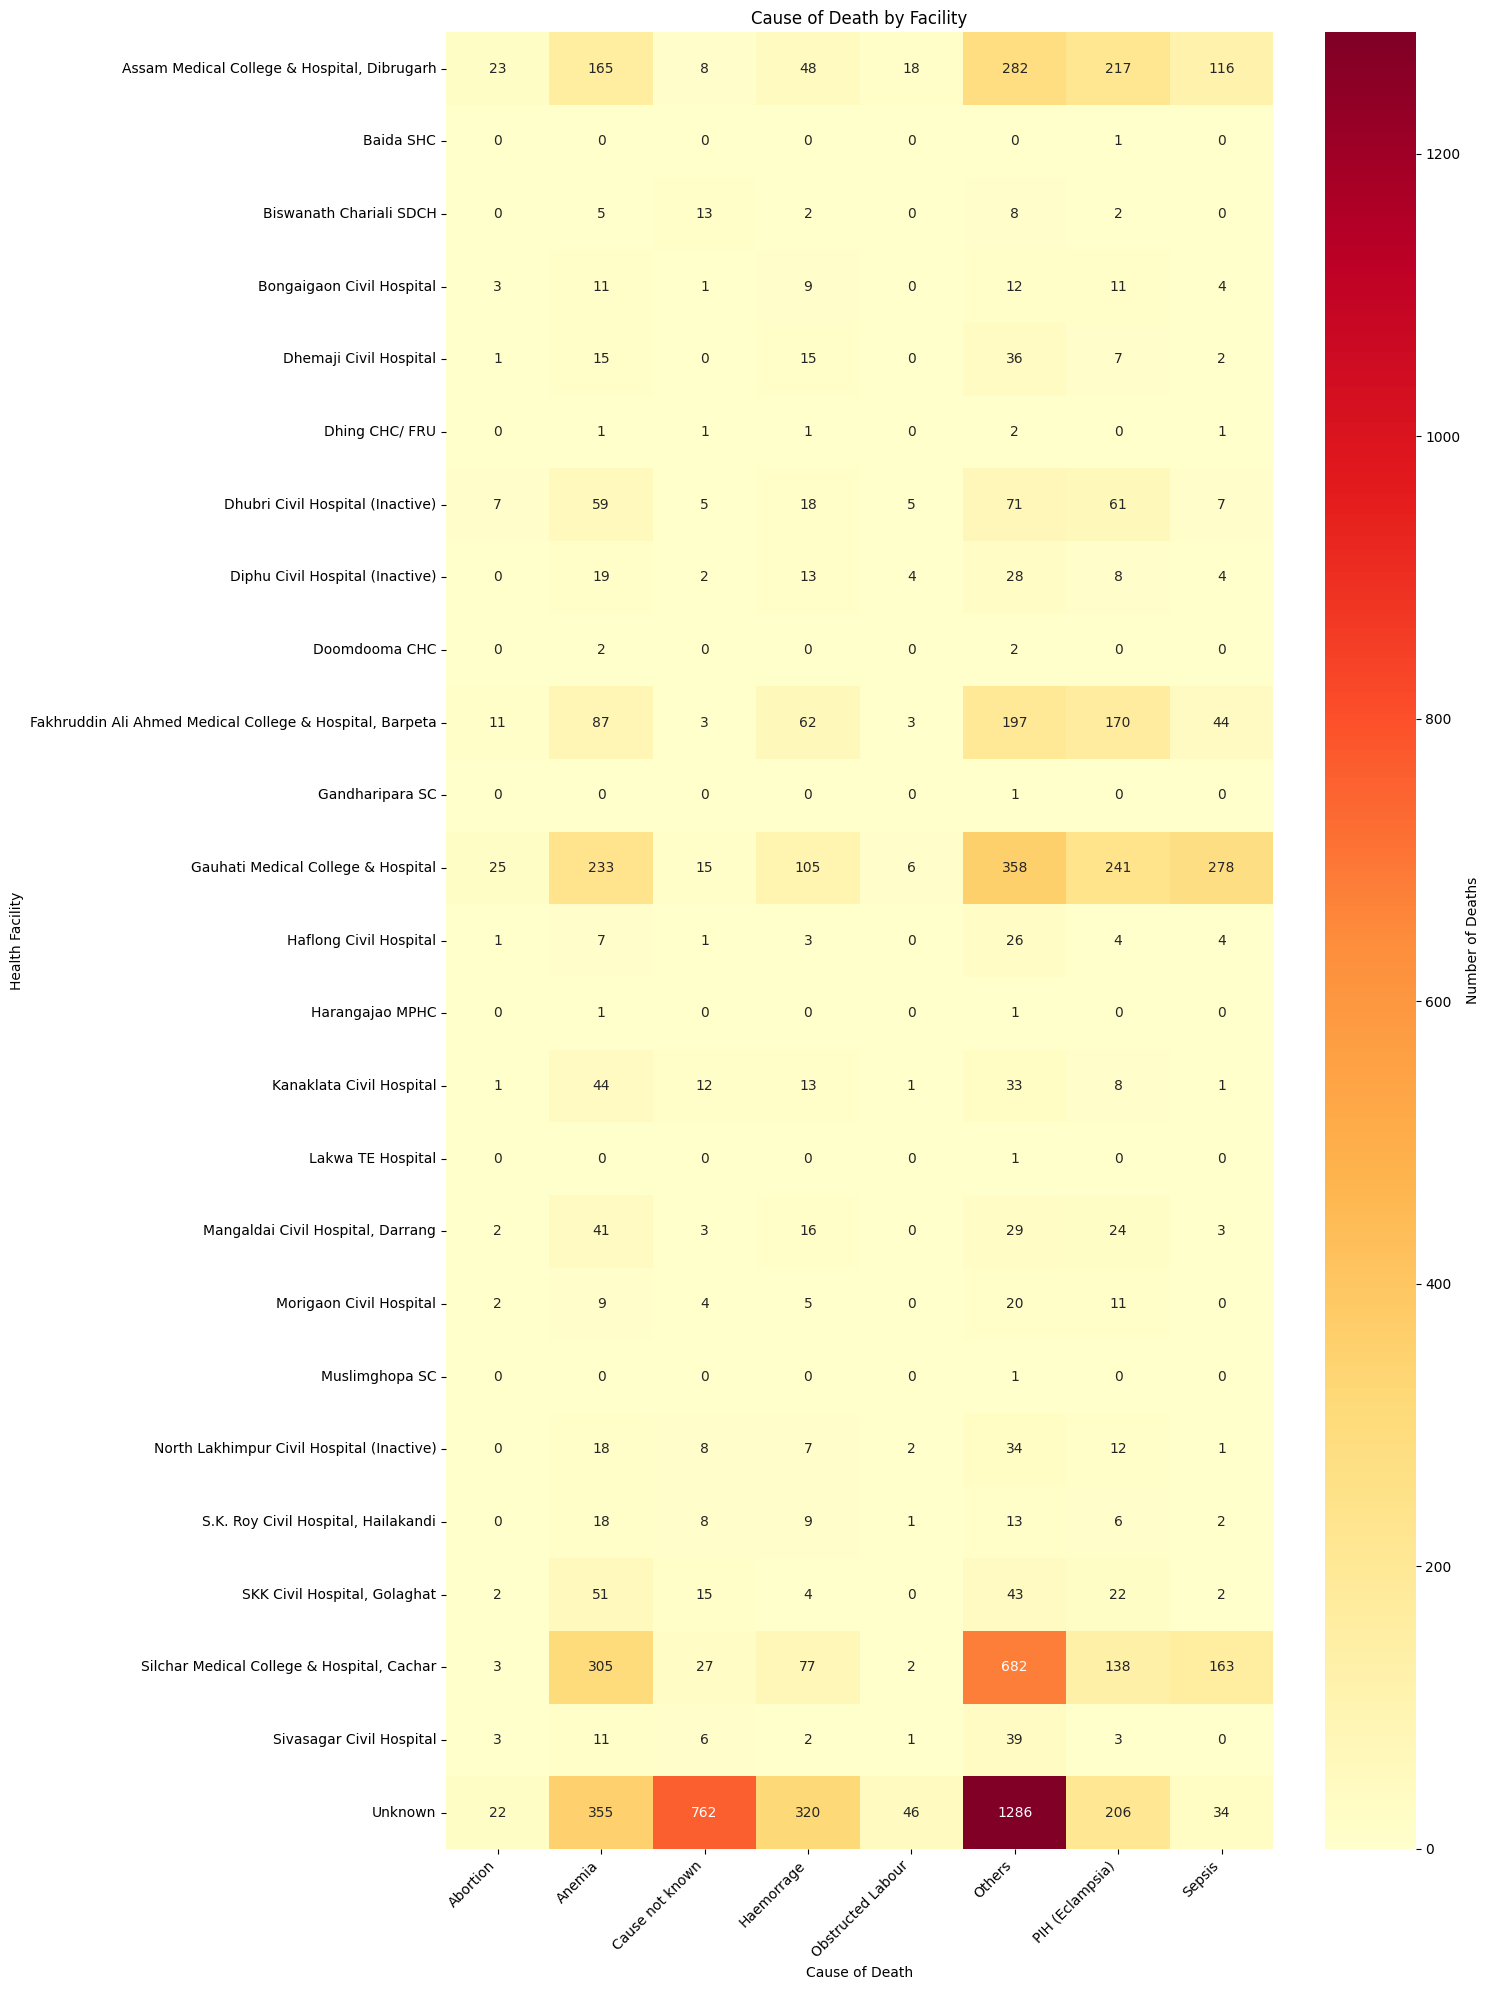

In [ ]:

def analyze_cause_by_facility(df):
    """Create heatmap of causes by facility"""
    # Limit to only the first 25 districts (or choose specific ones if required)
    top_25_districts = df['Reporting Health Institution'].unique()[:25]  # Change this to select specific districts if needed
    df_filtered = df[df['Reporting Health Institution'].isin(top_25_districts)]

    # Create crosstab of facility and cause of death
    facility_cause = pd.crosstab(
        df_filtered['Reporting Health Institution'],
        df_filtered['Cause of Death']
    )

    plt.figure(figsize=(15, 20))

    # Plot the heatmap
    sns.heatmap(facility_cause,
                cmap='YlOrRd',
                annot=True,
                fmt='d',
                cbar_kws={'label': 'Number of Deaths'})

    plt.title('Cause of Death by Facility')
    plt.xlabel('Cause of Death')
    plt.ylabel('Health Facility')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Example usage
analyze_cause_by_facility(df)


## Cause of Death Vs Age

<Figure size 2000x1800 with 0 Axes>

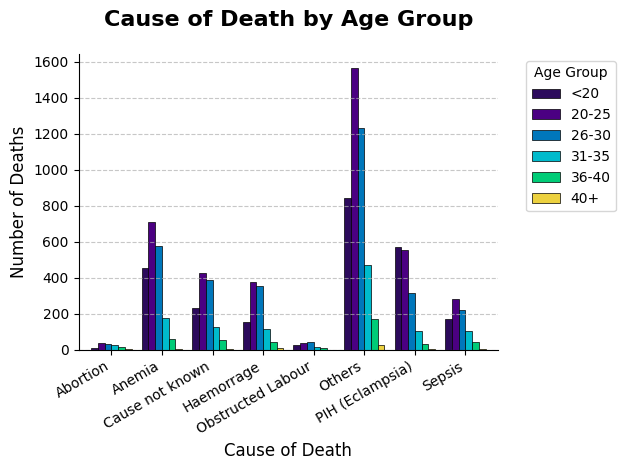

In [ ]:
def analyze_cause_by_age(df):
    """Create visualization for cause of death by age group"""
    # Create age groups
    df['Age_Group'] = pd.cut(df['Age'],
                            bins=[0, 20, 25, 30, 35, 40, 100],
                            labels=['<20', '20-25', '26-30', '31-35', '36-40', '40+'])

    # Create crosstab of cause of death by age group
    cause_age_deaths = pd.crosstab(df['Cause of Death'], df['Age_Group'])

    # Set figure size
    plt.figure(figsize=(20, 18))

    # Create bar plot with custom colors
    colors = ['#2C0A5C', '#4B0082', '#0077BB', '#00BBCC', '#00CC77', '#ECD13F']
    ax = cause_age_deaths.plot(kind='bar',
                              width=0.8,
                              color=colors,
                              edgecolor='black',
                              linewidth=0.5)

    # Customize the plot
    plt.title('Cause of Death by Age Group', pad=20, fontsize=16, fontweight='bold')
    plt.xlabel('Cause of Death', fontsize=12)
    plt.ylabel('Number of Deaths', fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=30, ha='right', fontsize=10)

    # Adjust legend
    plt.legend(title='Age Group',
              bbox_to_anchor=(1.05, 1),
              loc='upper left',
              fontsize=10)

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.show()

# Example usage
analyze_cause_by_age(df)

# Forecasting

In [ ]:
data = df

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjipdihcp/jhc1tdou.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjipdihcp/7jh9f6k1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87249', 'data', 'file=/tmp/tmpjipdihcp/jhc1tdou.json', 'init=/tmp/tmpjipdihcp/7jh9f6k1.json', 'output', 'file=/tmp/tmpjipdihcp/prophet_modelk5hk8en0/prophet_model-20241110074010.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:40:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:40:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


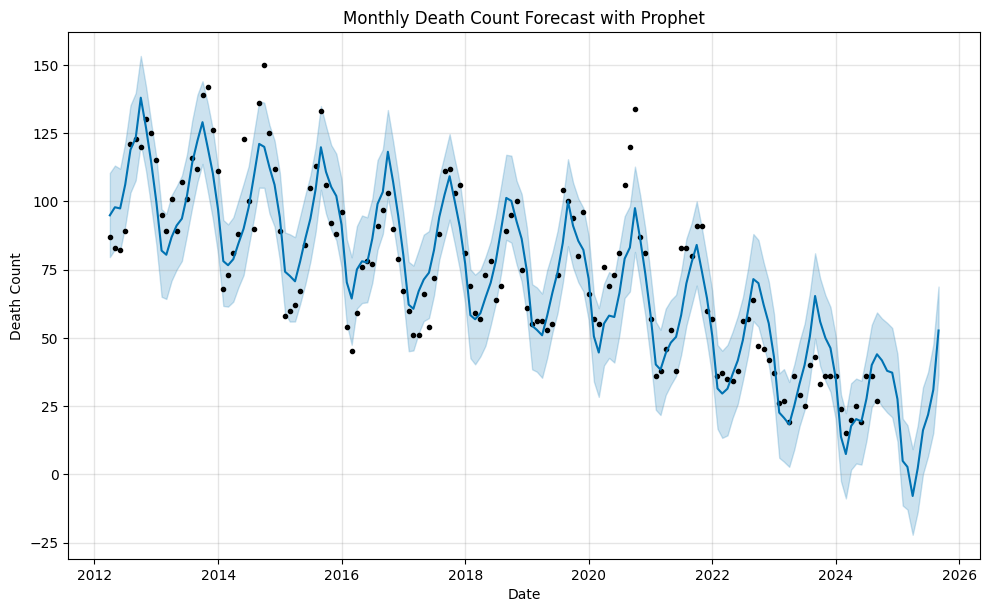

In [ ]:
data = df
data['Date of Death'] = pd.to_datetime(data['Date of Death'], format='%d/%m/%y', errors='coerce')
data = data.dropna(subset=['Date of Death'])

# Aggregate monthly
monthly_deaths = data.groupby(data['Date of Death'].dt.to_period('M')).size().reset_index()
monthly_deaths.columns = ['Date', 'Deaths']
monthly_deaths['Date'] = monthly_deaths['Date'].dt.to_timestamp()

# Prepare data for Prophet
prophet_data = monthly_deaths.rename(columns={'Date': 'ds', 'Deaths': 'y'})

# Fit the model
model = Prophet(yearly_seasonality=True)
model.fit(prophet_data)

# Create a future dataframe for predictions
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# Plot results
model.plot(forecast)
plt.title("Monthly Death Count Forecast with Prophet")
plt.xlabel("Date")
plt.ylabel("Death Count")
plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjipdihcp/kf6qmja_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjipdihcp/ndt30aai.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=63346', 'data', 'file=/tmp/tmpjipdihcp/kf6qmja_.json', 'init=/tmp/tmpjipdihcp/ndt30aai.json', 'output', 'file=/tmp/tmpjipdihcp/prophet_modelx4ywaltt/prophet_model-20241110074644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


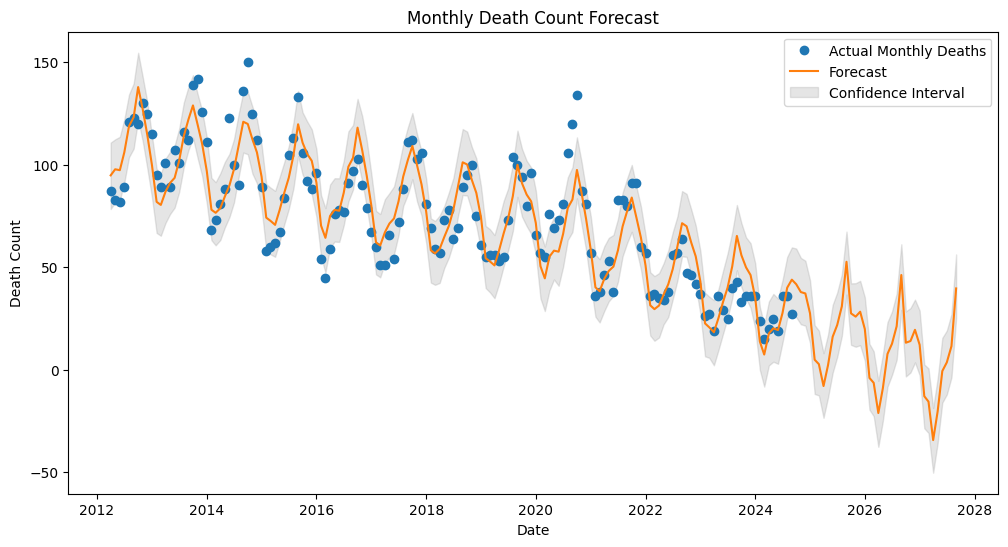

In [ ]:
data = df
data['Date of Death'] = pd.to_datetime(data['Date of Death'], format='%d/%m/%y', errors='coerce')
data = data.dropna(subset=['Date of Death'])

# Aggregate deaths by month
monthly_deaths = data.groupby(data['Date of Death'].dt.to_period('M')).size().reset_index()
monthly_deaths.columns = ['Date', 'Deaths']
monthly_deaths['Date'] = monthly_deaths['Date'].dt.to_timestamp()

# Prepare data for Prophet
prophet_data = monthly_deaths.rename(columns={'Date': 'ds', 'Deaths': 'y'})

# Fit Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(prophet_data)

# Create future dataframe for monthly prediction
future = model.make_future_dataframe(periods=36, freq='M')  # Predicting 12 months ahead
forecast = model.predict(future)

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], 'o', label='Actual Monthly Deaths')  # Original data as dots
plt.plot(forecast['ds'], forecast['yhat'], '-', label='Forecast')  # Forecast line
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title("Monthly Death Count Forecast")
plt.xlabel("Date")
plt.ylabel("Death Count")
plt.legend()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjipdihcp/pt1z501q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpjipdihcp/__apo_fz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35764', 'data', 'file=/tmp/tmpjipdihcp/pt1z501q.json', 'init=/tmp/tmpjipdihcp/__apo_fz.json', 'output', 'file=/tmp/tmpjipdihcp/prophet_modelh4yo8b29/prophet_model-20241110074839.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:48:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:48:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


MAE: 9.542845604693872
MSE: 151.5213801441756
RMSE: 12.309402103440101


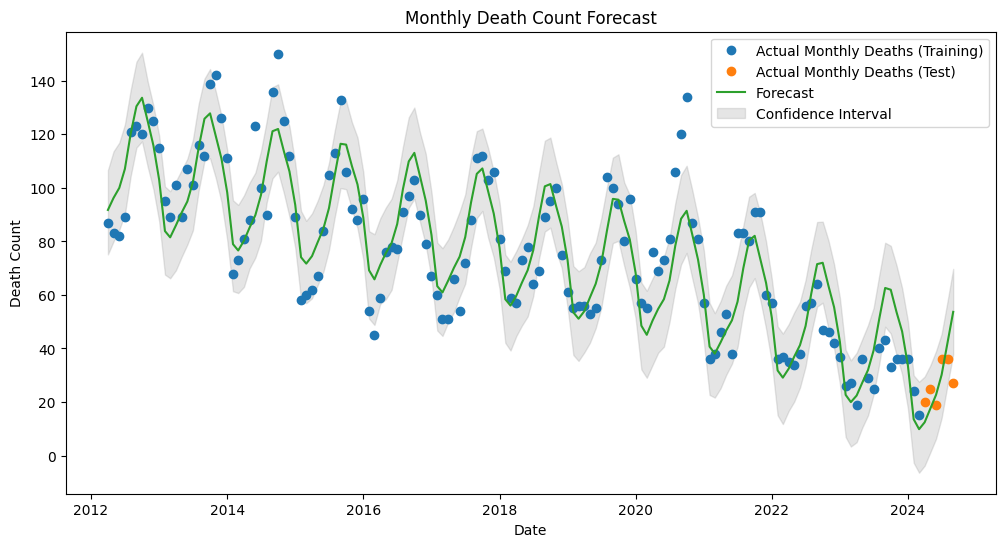

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Prepare data for forecasting (assuming your original dataframe 'df' is ready)
data = df.copy()
data['Date of Death'] = pd.to_datetime(data['Date of Death'], format='%d/%m/%y', errors='coerce')
data = data.dropna(subset=['Date of Death'])

# Aggregate deaths by month
monthly_deaths = data.groupby(data['Date of Death'].dt.to_period('M')).size().reset_index()
monthly_deaths.columns = ['Date', 'Deaths']
monthly_deaths['Date'] = monthly_deaths['Date'].dt.to_timestamp()

# Split data into train and test sets (using the last 6 months for testing)
train_data = monthly_deaths.iloc[:-6]  # All but the last 6 months for training
test_data = monthly_deaths.iloc[-6:]   # Last 6 months for testing

# Prepare data for Prophet (train and test)
train_prophet_data = train_data.rename(columns={'Date': 'ds', 'Deaths': 'y'})
test_prophet_data = test_data.rename(columns={'Date': 'ds', 'Deaths': 'y'})

# Fit Prophet model
model = Prophet(yearly_seasonality=True)
model.fit(train_prophet_data)

# Create future dataframe for monthly prediction
future = model.make_future_dataframe(periods=6, freq='M')  # Predicting the next 6 months
forecast = model.predict(future)

# Evaluate accuracy: Compare the forecast with the actual values in the test set
predictions = forecast['yhat'][-6:].values
actual_values = test_prophet_data['y'].values

# Calculate accuracy metrics
mae = mean_absolute_error(actual_values, predictions)
mse = mean_squared_error(actual_values, predictions)
rmse = np.sqrt(mse)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

# Plot the actual and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train_prophet_data['ds'], train_prophet_data['y'], 'o', label='Actual Monthly Deaths (Training)')
plt.plot(test_prophet_data['ds'], test_prophet_data['y'], 'o', label='Actual Monthly Deaths (Test)')
plt.plot(forecast['ds'], forecast['yhat'], '-', label='Forecast')  # Forecast line
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title("Monthly Death Count Forecast")
plt.xlabel("Date")
plt.ylabel("Death Count")
plt.legend()
plt.show()


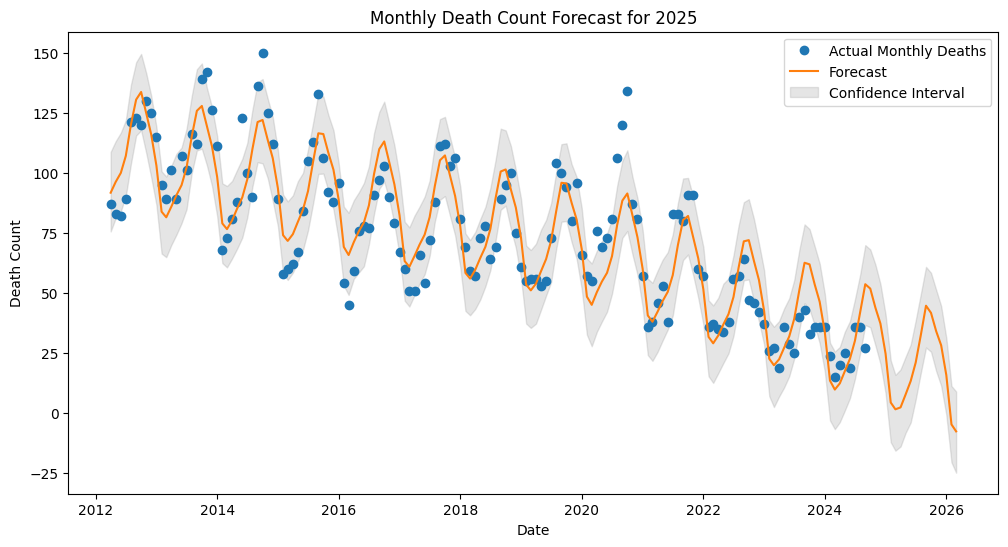

            ds       yhat  yhat_lower  yhat_upper
154 2025-01-31   4.458420  -12.060600   21.951681
155 2025-02-28   1.639423  -15.561899   15.947792
156 2025-03-31   2.433448  -13.840435   18.222319
157 2025-04-30   7.735595   -8.220967   23.415862
158 2025-05-31  13.421576   -3.826420   28.574479
159 2025-06-30  21.092730    5.720859   38.613627
160 2025-07-31  32.609469   16.858308   49.686814
161 2025-08-31  44.738422   27.354398   60.903216
162 2025-09-30  41.760514   25.602366   58.429966
163 2025-10-31  34.159015   17.557887   51.347285
164 2025-11-30  28.268590   11.476849   44.615945
165 2025-12-31  15.867574   -0.620332   31.380447


In [ ]:
# Create future dataframe for predicting into 2025 (assuming monthly data)
future = model.make_future_dataframe(periods=24, freq='M')  # Forecasting 12 months ahead

# Predict the future values
forecast = model.predict(future)

# Plot the forecast for 2025 along with historical data
plt.figure(figsize=(12, 6))
plt.plot(prophet_data['ds'], prophet_data['y'], 'o', label='Actual Monthly Deaths')  # Historical data
plt.plot(forecast['ds'], forecast['yhat'], '-', label='Forecast')  # Forecasted values
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='gray', alpha=0.2, label='Confidence Interval')
plt.title("Monthly Death Count Forecast for 2025")
plt.xlabel("Date")
plt.ylabel("Death Count")
plt.legend()
plt.show()

# Displaying forecasted values for 2025
forecast_2025 = forecast[forecast['ds'].dt.year == 2025]
print(forecast_2025[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])


### Interpretation of the Forecasted Output

1. **`ds`**: The date for the forecasted value.
   - For example, `2025-01-31` represents the forecast for January 2025.

2. **`yhat`**: The predicted death count for that particular date.
   - For example, the predicted death count for January 2025 is `4.46`.

3. **`yhat_lower` and `yhat_upper`**: The confidence interval for the predicted value (`yhat`).
   - For January 2025, the model predicts a death count of `4.46`, but it also estimates that the true value could fall between **-12.06** and **21.95** with a certain confidence level (usually 80% by default).

### Explanation of Uncertainty:
- The wider the difference between `yhat_lower` and `yhat_upper`, the greater the uncertainty in the prediction. For example, for January 2025:
  - The range is from **-12.06** to **21.95**, which is quite a wide range. This suggests that the model is less confident about its prediction for that time period.

### Key Observations:
1. **Large Uncertainty**: Some of the confidence intervals (such as for January 2025) are wide and contain negative values, which do not make sense in the context of death counts. This indicates high uncertainty or potential problems in the model's predictions for those months.

2. **Increasing Trend**: The `yhat` values show an increasing trend from January to December 2025. For example, death counts rise from `4.46` in January to `15.87` in December, suggesting the model anticipates an upward trend.

### Next Steps:
- **Improving the Forecast**: To improve the prediction, consider:
  - Ensuring that the model is trained on sufficient data.
  - Tuning parameters like `seasonality`, `holidays`, and `changepoint_prior_scale` in Prophet.
  - Cleaning the data and checking for outliers or missing values.
